#Import required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
pd.pandas.set_option('display.max_columns',None)
# sns.set_style("whitegrid")

#Load Dataset

In [ ]:
data=pd.read_csv(r"/content/Property_Price_Train.csv")
data

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type  \
0        1              60          RLD        65.0      8450     Paved   
1        2              20          RLD        80.0      9600     Paved   
2        3              60          RLD        68.0     11250     Paved   
3        4              70          RLD        60.0      9550     Paved   
4        5              60          RLD        84.0     14260     Paved   
...    ...             ...          ...         ...       ...       ...   
1454  1455              20          FVR        62.0      7500     Paved   
1455  1456              60          RLD        62.0      7917     Paved   
1456  1457              20          RLD        85.0     13175     Paved   
1457  1458              70          RLD        66.0      9042     Paved   
1458  1459              20          RLD        68.0      9717     Paved   

     Lane_Type Property_Shape Land_Outline Utility_Type Lot_Configuration  \
0          NaN            Reg          Lvl       AllPub                 I   
1          NaN            Reg          Lvl       AllPub              FR2P   
2          NaN            IR1          Lvl       AllPub                 I   
3          NaN            IR1          Lvl       AllPub                 C   
4          NaN            IR1          Lvl       AllPub              FR2P   
...        ...            ...          ...          ...               ...   
1454     Paved            Reg          Lvl       AllPub                 I   
1455       NaN            Reg          Lvl       AllPub                 I   
1456       NaN            Reg          Lvl       AllPub                 I   
1457       NaN            Reg          Lvl       AllPub                 I   
1458       NaN            Reg          Lvl       AllPub                 I   

     Property_Slope Neighborhood Condition1 Condition2 House_Type  \
0                GS      CollgCr       Norm       Norm       1Fam   
1                GS      Veenker      Feedr       Norm       1Fam   
2                GS      CollgCr       Norm       Norm       1Fam   
3                GS      Crawfor       Norm       Norm       1Fam   
4                GS      NoRidge       Norm       Norm       1Fam   
...             ...          ...        ...        ...        ...   
1454             GS      Somerst       Norm       Norm       1Fam   
1455             GS      Gilbert       Norm       Norm       1Fam   
1456             GS       NWAmes       Norm       Norm       1Fam   
1457             GS      Crawfor       Norm       Norm       1Fam   
1458             GS        NAmes       Norm       Norm       1Fam   

     House_Design  Overall_Material  House_Condition  Construction_Year  \
0          2Story                 7                5               2003   
1          1Story                 6                8               1976   
2          2Story                 7                5               2001   
3          2Story                 7                5               1915   
4          2Story                 8                5               2000   
...           ...               ...              ...                ...   
1454       1Story                 7                5               2004   
1455       2Story                 6                5               1999   
1456       1Story                 6                6               1978   
1457       2Story                 7                9               1941   
1458       1Story                 5                6               1950   

      Remodel_Year Roof_Design Roof_Quality Exterior1st Exterior2nd  \
0             2003       Gable           SS     VinylSd     VinylSd   
1             1976       Gable           SS     MetalSd     MetalSd   
2             2002       Gable           SS     VinylSd     VinylSd   
3             1970       Gable           SS     Wd Sdng     Wd Shng   
4             2000       Gable           SS     VinylSd     VinylSd   
...            ...        

In [ ]:
data.isnull().sum().sum()

6960

In [ ]:
data.head()

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type Lane_Type  \
0   1              60          RLD        65.0      8450     Paved       NaN   
1   2              20          RLD        80.0      9600     Paved       NaN   
2   3              60          RLD        68.0     11250     Paved       NaN   
3   4              70          RLD        60.0      9550     Paved       NaN   
4   5              60          RLD        84.0     14260     Paved       NaN   

  Property_Shape Land_Outline Utility_Type Lot_Configuration Property_Slope  \
0            Reg          Lvl       AllPub                 I             GS   
1            Reg          Lvl       AllPub              FR2P             GS   
2            IR1          Lvl       AllPub                 I             GS   
3            IR1          Lvl       AllPub                 C             GS   
4            IR1          Lvl       AllPub              FR2P             GS   

  Neighborhood Condition1 Condition2 House_Type House_Design  \
0      CollgCr       Norm       Norm       1Fam       2Story   
1      Veenker      Feedr       Norm       1Fam       1Story   
2      CollgCr       Norm       Norm       1Fam       2Story   
3      Crawfor       Norm       Norm       1Fam       2Story   
4      NoRidge       Norm       Norm       1Fam       2Story   

   Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
0                 7                5               2003          2003   
1                 6                8               1976          1976   
2                 7                5               2001          2002   
3                 7                5               1915          1970   
4                 8                5               2000          2000   

  Roof_Design Roof_Quality Exterior1st Exterior2nd Brick_Veneer_Type  \
0       Gable           SS     VinylSd     VinylSd           BrkFace   
1       Gable           SS     MetalSd     MetalSd              None   
2       Gable           SS     VinylSd     VinylSd           BrkFace   
3       Gable           SS     Wd Sdng     Wd Shng              None   
4       Gable           SS     VinylSd     VinylSd           BrkFace   

   Brick_Veneer_Area Exterior_Material Exterior_Condition Foundation_Type  \
0              196.0                Gd                 TA              PC   
1                0.0                TA                 TA              CB   
2              162.0                Gd                 TA              PC   
3                0.0                TA                 TA              BT   
4              350.0                Gd                 TA              PC   

  Basement_Height Basement_Condition Exposure_Level BsmtFinType1  BsmtFinSF1  \
0              Gd                 TA             No          GLQ         706   
1              Gd                 TA             Gd          ALQ         978   
2              Gd                 TA             Mn          GLQ         486   
3              TA                 Gd             No          ALQ         216   
4              Gd                 TA             Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  Total_Basement_Area Heating_Type  \
0          Unf           0        150                  856         GasA   
1          Unf           0        284                 1262         GasA   
2          Unf           0        434                  920         GasA   
3          Unf           0        540                  756         GasA   
4          Unf           0        490                 1145         GasA   

  Heating_Quality Air_Conditioning Electrical_System  First_Floor_Area  \
0              Ex                Y             SBrkr               856   
1              Ex                Y             SBrkr              1262   
2              Ex                Y             SBrkr               920   
3              Gd                Y             SBrkr               961   
4              Ex        

In [ ]:
data.shape

(1459, 81)

In [ ]:
data1=pd.read_csv(r"/content/Property_Price_Test.csv")
data1

Id  Building_Class Zoning_Class  Lot_Extent      Lot_Size Road_Type  \
0     1461              20          RHD        80.0  16104.819760     Paved   
1     1462              20          RLD        81.0  15639.150810     Paved   
2     1463              60          RLD        74.0   3849.428920     Paved   
3     1464              60          RLD        78.0   4955.447942     Paved   
4     1465             120          RLD        43.0   3046.604942     Paved   
...    ...             ...          ...         ...           ...       ...   
1454  2915             160          RMD        21.0  14584.838440     Paved   
1455  2916             160          RMD        21.0   8072.991379     Paved   
1456  2917              20          RLD       160.0   7367.775348     Paved   
1457  2918              85          RLD        62.0   2203.135444     Paved   
1458  2919              60          RLD        74.0   6253.431852     Paved   

     Lane_Type Property_Shape Land_Outline Utility_Type Lot_Configuration  \
0          NaN            Reg          Lvl       AllPub                 I   
1          NaN            IR1          Lvl       AllPub                 C   
2          NaN            IR1          Lvl       AllPub                 I   
3          NaN            IR1          Lvl       AllPub                 I   
4          NaN            IR1          HLS       AllPub                 I   
...        ...            ...          ...          ...               ...   
1454       NaN            Reg          Lvl       AllPub                 I   
1455       NaN            Reg          Lvl       AllPub                 I   
1456       NaN            Reg          Lvl       AllPub                 I   
1457       NaN            Reg          Lvl       AllPub                 I   
1458       NaN            Reg          Lvl       AllPub                 I   

     Property_Slope Neighborhood Condition1 Condition2 House_Type  \
0                GS        NAmes      Feedr       Norm       1Fam   
1                GS        NAmes       Norm       Norm       1Fam   
2                GS      Gilbert       Norm       Norm       1Fam   
3                GS      Gilbert       Norm       Norm       1Fam   
4                GS      StoneBr       Norm       Norm     TwnhsE   
...             ...          ...        ...        ...        ...   
1454             GS      MeadowV      NoRMD      NoRMD      Twnhs   
1455             GS      MeadowV      NoRMD      NoRMD     TwnhsE   
1456             GS      Mitchel       Norm       Norm       1Fam   
1457             GS      Mitchel       Norm       Norm       1Fam   
1458             MS      Mitchel       Norm       Norm       1Fam   

     House_Design  Overall_Material  House_Condition  Construction_Year  \
0          1Story                 5                6               1961   
1          1Story                 6                6               1958   
2          2Story                 5                5               1997   
3          2Story                 6                6               1998   
4          1Story                 8                5               1992   
...           ...               ...              ...                ...   
1454       2Story                 4                7               1970   
1455       2Story                 4                5               1970   
1456       1Story                 5                7               1960   
1457       SFoyer                 5                5               1992   
1458       2Story                 7                5               1993   

      Remodel_Year Roof_Design Roof_Quality Exterior1st Exterior2nd  \
0             1961       Gable           SS     VinylSd     VinylSd   
1             1958         Hip           SS     Wd Sdng     Wd Sdng   
2             1998       Gable           SS     VinylSd     VinylSd   
3             1998       Gable           SS     VinylSd     VinylSd   
4             1992       Gable           SS     H

In [ ]:
data1.head()

Id  Building_Class Zoning_Class  Lot_Extent      Lot_Size Road_Type  \
0  1461              20          RHD        80.0  16104.819760     Paved   
1  1462              20          RLD        81.0  15639.150810     Paved   
2  1463              60          RLD        74.0   3849.428920     Paved   
3  1464              60          RLD        78.0   4955.447942     Paved   
4  1465             120          RLD        43.0   3046.604942     Paved   

  Lane_Type Property_Shape Land_Outline Utility_Type Lot_Configuration  \
0       NaN            Reg          Lvl       AllPub                 I   
1       NaN            IR1          Lvl       AllPub                 C   
2       NaN            IR1          Lvl       AllPub                 I   
3       NaN            IR1          Lvl       AllPub                 I   
4       NaN            IR1          HLS       AllPub                 I   

  Property_Slope Neighborhood Condition1 Condition2 House_Type House_Design  \
0             GS        NAmes      Feedr       Norm       1Fam       1Story   
1             GS        NAmes       Norm       Norm       1Fam       1Story   
2             GS      Gilbert       Norm       Norm       1Fam       2Story   
3             GS      Gilbert       Norm       Norm       1Fam       2Story   
4             GS      StoneBr       Norm       Norm     TwnhsE       1Story   

   Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
0                 5                6               1961          1961   
1                 6                6               1958          1958   
2                 5                5               1997          1998   
3                 6                6               1998          1998   
4                 8                5               1992          1992   

  Roof_Design Roof_Quality Exterior1st Exterior2nd Brick_Veneer_Type  \
0       Gable           SS     VinylSd     VinylSd              None   
1         Hip           SS     Wd Sdng     Wd Sdng           BrkFace   
2       Gable           SS     VinylSd     VinylSd              None   
3       Gable           SS     VinylSd     VinylSd           BrkFace   
4       Gable           SS     HdBoard     HdBoard              None   

   Brick_Veneer_Area Exterior_Material Exterior_Condition Foundation_Type  \
0                0.0                TA                 TA              CB   
1              108.0                TA                 TA              CB   
2                0.0                TA                 TA              PC   
3               20.0                TA                 TA              PC   
4                0.0                Gd                 TA              PC   

  Basement_Height Basement_Condition Exposure_Level BsmtFinType1  BsmtFinSF1  \
0              TA                 TA             No          Rec       468.0   
1              TA                 TA             No          ALQ       923.0   
2              Gd                 TA             No          GLQ       791.0   
3              TA                 TA             No          GLQ       602.0   
4              Gd                 TA             No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  Total_Basement_Area Heating_Type  \
0          LwQ       144.0      270.0                882.0         GasA   
1          Unf         0.0      406.0               1329.0         GasA   
2          Unf         0.0      137.0                928.0         GasA   
3          Unf         0.0      324.0                926.0         GasA   
4          Unf         0.0     1017.0               1280.0         GasA   

  Heating_Quality Air_Conditioning Electrical_System  First_Floor_Area  \
0              TA                Y             SBrkr               896   
1              TA                Y             SBrkr              1329   
2              Gd                Y             SBrkr               928   
3              Ex                Y             SBrkr             

#Numerical and Categorical features

In [ ]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [ ]:
print(data[numerical_feats].columns)
print("*"*100)
print(data[categorical_feats].columns)

Index(['Id', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')
****************************************************************************************************
Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
      

#Check information of Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [ ]:
data.describe()

Id  Building_Class   Lot_Extent       Lot_Size  \
count  1459.000000     1459.000000  1200.000000    1459.000000   
mean    730.000000       56.922550    70.045833   10517.225497   
std     421.321334       42.304033    24.294456    9984.675721   
min       1.000000       20.000000    21.000000    1300.000000   
25%     365.500000       20.000000    59.000000    7549.000000   
50%     730.000000       50.000000    69.000000    9477.000000   
75%    1094.500000       70.000000    80.000000   11603.000000   
max    1459.000000      190.000000   313.000000  215245.000000   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.100069         5.575051        1971.272104   1984.879369   
std            1.383171         1.113125          30.212814     20.645927   
min            1.000000         1.000000        1872.000000   1950.000000   
25%            5.000000         5.000000        1954.000000   1967.000000   
50%            6.000000         5.000000        1973.000000   1994.000000   
75%            7.000000         6.000000        2000.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count         1451.00000  1459.000000  1459.000000  1459.000000   
mean           103.75672   443.374914    46.382454   567.535984   
std            181.10815   456.142186   161.248500   441.874057   
min              0.00000     0.000000     0.000000     0.000000   
25%              0.00000     0.000000     0.000000   223.500000   
50%              0.00000   383.000000     0.000000   479.000000   
75%            166.00000   712.000000     0.000000   808.000000   
max           1600.00000  5644.000000  1474.000000  2336.000000   

       Total_Basement_Area  First_Floor_Area  Second_Floor_Area  LowQualFinSF  \
count          1459.000000       1459.000000        1459.000000   1459.000000   
mean           1057.293352       1162.562714         347.230295      5.848526   
std             438.824912        386.712553         436.583480     48.639512   
min               0.000000        334.000000           0.000000      0.000000   
25%             795.500000        882.000000           0.000000      0.000000   
50%             991.000000       1086.000000           0.000000      0.000000   
75%            1298.500000       1391.500000         728.000000      0.000000   
max            6110.000000       4692.000000        2065.000000    572.000000   

       Grade_Living_Area  Underground_Full_Bathroom  \
count        1459.000000                1459.000000   
mean         1515.641535                   0.424949   
std           525.616607                   0.518870   
min           334.000000                   0.000000   
25%          1129.000000                   0.000000   
50%          1464.000000                   0.000000   
75%          1777.500000                   1.000000   
max          5642.000000                   3.000000   

       Underground_Half_Bathroom  Full_Bathroom_Above_Grade  \
count                1459.000000                1459.000000   
mean                    0.057574                   1.565456   
std                     0.238830                   0.550906   
min                     0.000000                   0.000000   
25%                     0.000000                   1.000000   
50%                     0.000000                   2.000000   
75%                     0.000000                   2.000000   
max                     2.000000                   3.000000   

       Half_Bathroom_Above_Grade  Bedroom_Above_Grade  Kitchen_Above_Grade  \
count                1459.000000          1459.000000          1459.000000   
mean                    0.382454             2.866347             1.046607   
std                     0.502798             0.816050             0.220410   
min              

#Check if missing value is present or not for train

In [ ]:
data.isnull().sum().sum()  #Missing values in train data ?

6960

In [ ]:
#List of features with missing values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Pool_Quality            1452  0.995202
Miscellaneous_Feature   1405  0.962988
Lane_Type               1368  0.937629
Fence_Quality           1178  0.807402
Fireplace_Quality        689  0.472241
...                      ...       ...
Exterior_Material          0  0.000000
Exterior2nd                0  0.000000
Exterior1st                0  0.000000
Roof_Quality               0  0.000000
Sale_Price                 0  0.000000

[81 rows x 2 columns]

In [ ]:
drop_col=["Id","Miscellaneous_Feature","Fence_Quality","Pool_Quality","Lane_Type"]# value have a 50% missing value

In [ ]:
data.drop(drop_col,axis=1,inplace=True)

#Filling missing values
For a few columns there is lots of NaN entries.
However, reading the data description we find this is not missing data:
For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.



In [ ]:


cols_to_replace = ["Lot_Extent","Garage_Built_Year","Garage","Garage_Finish_Year","Fireplace_Quality","Screen_Lobby_Area"]
data[cols_to_replace] = data[cols_to_replace].replace('NA', np.nan)


In [ ]:
#these col written there NA              "Lot_Extent",
#'Garage_Built_Year',
#"Garage","Garage_Finish_Year",
#"Fireplace_Quality",
#"Screen_Lobby_Area",
#"Pool_Quality",
#"Fence_Quality",
#"Miscellaneous_Feature"

In [ ]:
data.Lot_Extent.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      52
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: Lot_Extent, Length: 110, dtype: int64

In [ ]:
data.Lot_Extent=data.Lot_Extent.fillna(46.0 )

In [ ]:
data.Brick_Veneer_Type.value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: Brick_Veneer_Type, dtype: int64

In [ ]:
data.Brick_Veneer_Type=data.Brick_Veneer_Type.fillna("BrkCmn")

In [ ]:
data.Brick_Veneer_Area.value_counts()

0.0      860
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: Brick_Veneer_Area, Length: 327, dtype: int64

In [ ]:
data.Brick_Veneer_Area=data.Brick_Veneer_Area.fillna(119)

In [ ]:
data.Basement_Height.value_counts()

TA    648
Gd    618
Ex    121
Fa     35
Name: Basement_Height, dtype: int64

In [ ]:
data.Basement_Height=data.Basement_Height.fillna("Fa")

In [ ]:
data.Basement_Condition.value_counts()

TA    1310
Gd      65
Fa      45
Po       2
Name: Basement_Condition, dtype: int64

In [ ]:
data.Basement_Condition=data.Basement_Condition.fillna("Po")

In [ ]:
data.Exposure_Level.value_counts()

No    952
Av    221
Gd    134
Mn    114
Name: Exposure_Level, dtype: int64

In [ ]:
data.Exposure_Level=data.Exposure_Level.fillna("Mn")

In [ ]:
data.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    147
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [ ]:
data.BsmtFinType1=data.BsmtFinType1.fillna("LwQ")

In [ ]:
data.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      45
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [ ]:
data.BsmtFinType2=data.BsmtFinType2.fillna("GLQ")

In [ ]:
data.Electrical_System.value_counts()

SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical_System, dtype: int64

In [ ]:
data.Electrical_System=data.Electrical_System.fillna("Mix")

In [ ]:
data.Garage.value_counts()

Attchd     869
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2TFes        5
2Types       1
Name: Garage, dtype: int64

In [ ]:
data.Garage=data.Garage.fillna("2Types")

In [ ]:
data.Garage_Built_Year.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: Garage_Built_Year, Length: 97, dtype: int64

In [ ]:
data.Garage_Built_Year=data.Garage_Built_Year.fillna(1933)

In [ ]:
data.Garage_Finish_Year.value_counts()

Unf    605
RFn    422
Fin    351
Name: Garage_Finish_Year, dtype: int64

In [ ]:
data.Garage_Finish_Year=data.Garage_Finish_Year.fillna("Fin")

In [ ]:
data.Garage_Quality.value_counts()

TA    1310
Fa      48
Gd      14
Ex       3
Po       3
Name: Garage_Quality, dtype: int64

In [ ]:
data.Garage_Quality=data.Garage_Quality.fillna("Po")

In [ ]:
data.Garage_Condition.value_counts()

TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: Garage_Condition, dtype: int64

In [ ]:
data.Garage_Condition=data.Garage_Condition.fillna("Ex")

#Check Datatypes

In [ ]:
data.dtypes

Building_Class      int64
Zoning_Class       object
Lot_Extent        float64
Lot_Size            int64
Road_Type          object
                   ...   
Month_Sold          int64
Year_Sold           int64
Sale_Type          object
Sale_Condition     object
Sale_Price          int64
Length: 76, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   object 
 5   Property_Shape             1459 non-null   object 
 6   Land_Outline               1459 non-null   object 
 7   Utility_Type               1459 non-null   object 
 8   Lot_Configuration          1459 non-null   object 
 9   Property_Slope             1459 non-null   object 
 10  Neighborhood               1459 non-null   object 
 11  Condition1                 1459 non-null   object 
 12  Condition2                 1459 non-null   object 
 13  House_Type                 1459 non-null   objec

#Check information of test Dataset

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1455 non-null   object 
 3   Lot_Extent                 1232 non-null   float64
 4   Lot_Size                   1459 non-null   float64
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  107 non-null    object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1457 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [ ]:
drop_col=["Id","Miscellaneous_Feature","Fence_Quality","Pool_Quality","Fireplace_Quality","Lane_Type","Utility_Type"]# value have a 50% missing value

In [ ]:
data1.drop(drop_col,axis=1,inplace=True)

#Check if missing value is present or not for test¶

In [ ]:
data1.isnull().sum().sum() #Missing values in test data ?

883

In [ ]:
data1.Zoning_Class.value_counts()

RLD       1114
RMD        242
FVR         74
Commer      15
RHD         10
Name: Zoning_Class, dtype: int64

In [ ]:
data1.Zoning_Class=data.Zoning_Class.fillna("RHD")

In [ ]:
data1.Lot_Extent.value_counts()

60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
117.0      1
31.0       1
119.0      1
25.0       1
140.0      1
Name: Lot_Extent, Length: 115, dtype: int64

In [ ]:
data1.Lot_Extent=data.Lot_Extent.fillna(140)

In [ ]:
data1.Exterior1st.value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CB           1
Name: Exterior1st, dtype: int64

In [ ]:
data1.Exterior1st=data.Exterior1st.fillna("CB")

In [ ]:
data1.Brick_Veneer_Type.value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: Brick_Veneer_Type, dtype: int64

In [ ]:
data1.Brick_Veneer_Type=data.Brick_Veneer_Type.fillna("BrkCmn")

In [ ]:
data1.Basement_Height.value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: Basement_Height, dtype: int64

In [ ]:
data1.Basement_Height=data.Basement_Height.fillna("Fa")

In [ ]:
data1.Basement_Condition.value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: Basement_Condition, dtype: int64

In [ ]:
data1.Basement_Condition=data.Basement_Condition.fillna("Po")

In [ ]:
data1.BsmtFinType1.value_counts()

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [ ]:
data1.BsmtFinType1=data.BsmtFinType1.fillna("LwQ")

In [ ]:
data1.BsmtFinType2.value_counts()

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [ ]:
data1.BsmtFinType2=data.BsmtFinType2.fillna("GLQ")

In [ ]:
data1.BsmtUnfSF.value_counts()

0.0       123
384.0      11
624.0       8
738.0       7
100.0       7
         ... 
36.0        1
892.0       1
747.0       1
1216.0      1
1503.0      1
Name: BsmtUnfSF, Length: 793, dtype: int64

In [ ]:
data1.BsmtUnfSF=data.BsmtUnfSF.fillna(1503)

In [ ]:
data1.Underground_Full_Bathroom.value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: Underground_Full_Bathroom, dtype: int64

In [ ]:
data1.Underground_Full_Bathroom=data.Underground_Full_Bathroom.fillna(3)

In [ ]:
data1.Kitchen_Quality.value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: Kitchen_Quality, dtype: int64

In [ ]:
data1.Kitchen_Quality=data.Kitchen_Quality.fillna("Fa")

In [ ]:
data1.Functional_Rate.value_counts()

TF       1357
MD2        36
MD1        34
Mod        19
MajD1       5
MajD2       4
Sev         1
MS          1
Name: Functional_Rate, dtype: int64

In [ ]:
data1.Functional_Rate=data.Functional_Rate.fillna("MS")

In [ ]:
data1.Garage.value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2TFes       10
2Types       7
CarPort      6
Name: Garage, dtype: int64

In [ ]:
data1.Garage=data.Garage.fillna("CarPort")

In [ ]:
data1.Garage_Finish_Year.value_counts()

Unf    625
RFn    389
Fin    367
Name: Garage_Finish_Year, dtype: int64

In [ ]:
data1.Garage_Finish_Year=data.Garage_Finish_Year.fillna("Fin")

In [ ]:
data1.Garage_Area.value_counts()

0.0       76
576.0     50
440.0     47
484.0     34
400.0     33
          ..
453.0      1
1348.0     1
567.0      1
811.0      1
682.0      1
Name: Garage_Area, Length: 459, dtype: int64

In [ ]:
data1.Garage_Area=data.Garage_Area.fillna(682)

In [ ]:
data1.Garage_Condition.value_counts()

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: Garage_Condition, dtype: int64

In [ ]:
data1.Garage_Condition=data.Garage_Condition.fillna("Ex")

In [ ]:
data1.Exterior2nd.value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [ ]:
data1.Exterior2nd=data.Exterior2nd.fillna("Stone")

In [ ]:
data1.Brick_Veneer_Area.value_counts()

0.0       877
176.0      10
144.0       9
120.0       8
216.0       8
         ... 
647.0       1
1290.0      1
495.0       1
292.0       1
382.0       1
Name: Brick_Veneer_Area, Length: 303, dtype: int64

In [ ]:
data1.Brick_Veneer_Area=data.Brick_Veneer_Area.fillna(382)

In [ ]:
data1.Exposure_Level.value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: Exposure_Level, dtype: int64

In [ ]:
data1.Exposure_Level=data.Exposure_Level.fillna("Mn")

In [ ]:
data1.BsmtFinSF1.value_counts()

0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 669, dtype: int64

In [ ]:
data1.BsmtFinSF1=data.BsmtFinSF1.fillna(337)

In [ ]:
data1.BsmtFinSF2.value_counts()

0.0      1278
483.0       3
162.0       3
294.0       3
144.0       2
         ... 
110.0       1
186.0       1
449.0       1
48.0        1
344.0       1
Name: BsmtFinSF2, Length: 161, dtype: int64

In [ ]:
data1.BsmtFinSF2=data.BsmtFinSF2.fillna(344)

In [ ]:
data1.Total_Basement_Area.value_counts()

0.0       41
864.0     39
960.0     13
546.0     12
768.0     12
          ..
1146.0     1
1415.0     1
764.0      1
1367.0     1
996.0      1
Name: Total_Basement_Area, Length: 736, dtype: int64

In [ ]:
data1.Total_Basement_Area=data.Total_Basement_Area.fillna(996)

In [ ]:
data1.Underground_Half_Bathroom.value_counts()

0.0    1364
1.0      91
2.0       2
Name: Underground_Half_Bathroom, dtype: int64

In [ ]:
data1.Underground_Half_Bathroom=data.Underground_Half_Bathroom.fillna(2)

In [ ]:
data1.Garage_Built_Year.value_counts()

2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
          ..
1918.0     1
1895.0     1
1932.0     1
1916.0     1
1919.0     1
Name: Garage_Built_Year, Length: 97, dtype: int64

In [ ]:
data1.Garage_Built_Year=data.Garage_Built_Year.fillna(1919)

In [ ]:
data1.Garage_Size.value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: Garage_Size, dtype: int64

In [ ]:
data1.Garage_Size=data.Garage_Size.fillna(5)

In [ ]:
data1.Garage_Quality.value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: Garage_Quality, dtype: int64

In [ ]:
data1.Garage_Quality=data.Garage_Quality.fillna("Po")

In [ ]:
data1.Sale_Type.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: Sale_Type, dtype: int64

In [ ]:
data1.Sale_Type=data.Sale_Type.fillna("ConLw")

#Dtype Conversion

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data.Road_Type = le.fit_transform(data.Road_Type)
data.Land_Outline = le.fit_transform(data.Land_Outline)
data.Property_Slope = le.fit_transform(data.Property_Slope)
data.Condition1 = le.fit_transform(data.Condition1)
data.House_Type = le.fit_transform(data.House_Type )
data.Roof_Design = le.fit_transform(data.Roof_Design)
data.Exterior1st = le.fit_transform(data.Exterior1st)
data.Brick_Veneer_Type =le.fit_transform(data.Brick_Veneer_Type )
data.Exterior_Material = le.fit_transform(data.Exterior_Material)
data.BsmtFinType1 = le.fit_transform(data.BsmtFinType1)
data.Heating_Type = le.fit_transform(data.Heating_Type)
data.Air_Conditioning = le.fit_transform(data.Air_Conditioning)
data.Kitchen_Quality = le.fit_transform(data.Kitchen_Quality)
data.Functional_Rate = le.fit_transform(data.Functional_Rate)
data.Garage = le.fit_transform(data.Garage)
data.Garage_Finish_Year = le.fit_transform(data.Garage_Finish_Year)
data.Garage_Condition = le.fit_transform(data.Garage_Condition)
data.Sale_Condition =le.fit_transform(data.Sale_Condition)
data.Foundation_Type =le.fit_transform(data.Foundation_Type)
data.Basement_Height =le.fit_transform(data.Basement_Height)
data.Basement_Condition =le.fit_transform(data.Basement_Condition)
data.BsmtFinType2 =le.fit_transform(data.BsmtFinType2)
data.Zoning_Class =le.fit_transform(data.Zoning_Class)
data.Property_Shape =le.fit_transform(data.Property_Shape)
data.Utility_Type =le.fit_transform(data.Utility_Type)
data.Lot_Configuration =le.fit_transform(data.Lot_Configuration)
data.Neighborhood =le.fit_transform(data.Neighborhood)
data.House_Design =le.fit_transform(data.House_Design)
data.Roof_Quality =le.fit_transform(data.Roof_Quality)
data.Exterior2nd =le.fit_transform(data.Exterior2nd)
data.Exposure_Level =le.fit_transform(data.Exposure_Level)
data.Heating_Quality =le.fit_transform(data.Heating_Quality)
data.Electrical_System =le.fit_transform(data.Electrical_System)
data.Fireplace_Quality =le.fit_transform(data.Fireplace_Quality)
data.Pavedd_Drive =le.fit_transform(data.Pavedd_Drive)
data.Sale_Type =le.fit_transform(data.Sale_Type)
data.Condition2 =le.fit_transform(data.Condition2)
data.Exterior_Condition =le.fit_transform(data.Exterior_Condition)
data.Garage_Quality =le.fit_transform(data.Garage_Quality)

#Dtype Conversion for test

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1.Road_Type = le.fit_transform(data.Road_Type)
data1.Land_Outline = le.fit_transform(data.Land_Outline)
data1.Property_Slope = le.fit_transform(data.Property_Slope)
data1.Condition1 = le.fit_transform(data.Condition1)
data1.House_Type = le.fit_transform(data.House_Type )
data1.Roof_Design = le.fit_transform(data.Roof_Design)
data1.Exterior1st = le.fit_transform(data.Exterior1st)
data1.Brick_Veneer_Type =le.fit_transform(data.Brick_Veneer_Type )
data1.Exterior_Material = le.fit_transform(data.Exterior_Material)
data1.BsmtFinType1 = le.fit_transform(data.BsmtFinType1)
data1.Heating_Type = le.fit_transform(data.Heating_Type)
data1.Air_Conditioning = le.fit_transform(data.Air_Conditioning)
data1.Kitchen_Quality = le.fit_transform(data.Kitchen_Quality)
data1.Functional_Rate = le.fit_transform(data.Functional_Rate)
data1.Garage = le.fit_transform(data.Garage)
data1.Garage_Finish_Year = le.fit_transform(data.Garage_Finish_Year)
data1.Garage_Condition = le.fit_transform(data.Garage_Condition)
data1.Sale_Condition =le.fit_transform(data.Sale_Condition)
data1.Foundation_Type =le.fit_transform(data.Foundation_Type)
data1.Basement_Height =le.fit_transform(data.Basement_Height)
data1.Basement_Condition =le.fit_transform(data.Basement_Condition)
data1.BsmtFinType2 =le.fit_transform(data.BsmtFinType2)
data1.Zoning_Class =le.fit_transform(data.Zoning_Class)
data1.Property_Shape =le.fit_transform(data.Property_Shape)
data1.Utility_Type =le.fit_transform(data.Utility_Type)
data1.Lot_Configuration =le.fit_transform(data.Lot_Configuration)
data1.Neighborhood =le.fit_transform(data.Neighborhood)
data1.House_Design =le.fit_transform(data.House_Design)
data1.Roof_Quality =le.fit_transform(data.Roof_Quality)
data1.Exterior2nd =le.fit_transform(data.Exterior2nd)
data1.Exposure_Level =le.fit_transform(data.Exposure_Level)
data1.Heating_Quality =le.fit_transform(data.Heating_Quality)
data1.Electrical_System =le.fit_transform(data.Electrical_System)
data1.Fireplace_Quality =le.fit_transform(data.Fireplace_Quality)
data1.Pavedd_Drive =le.fit_transform(data.Pavedd_Drive)
data1.Condition2 =le.fit_transform(data.Condition2)
data1.Exterior_Condition =le.fit_transform(data.Exterior_Condition)
data1.Garage_Quality =le.fit_transform(data.Garage_Quality)
data1.Garage_Quality =le.fit_transform(data.Garage_Quality)
data1.Sale_Type =le.fit_transform(data.Sale_Type)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   int64  
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   float64
 4   Road_Type                  1459 non-null   int64  
 5   Property_Shape             1459 non-null   int64  
 6   Land_Outline               1459 non-null   int64  
 7   Lot_Configuration          1459 non-null   int64  
 8   Property_Slope             1459 non-null   int64  
 9   Neighborhood               1459 non-null   int64  
 10  Condition1                 1459 non-null   int64  
 11  Condition2                 1459 non-null   int64  
 12  House_Type                 1459 non-null   int64  
 13  House_Design               1459 non-null   int64

<Axes: >

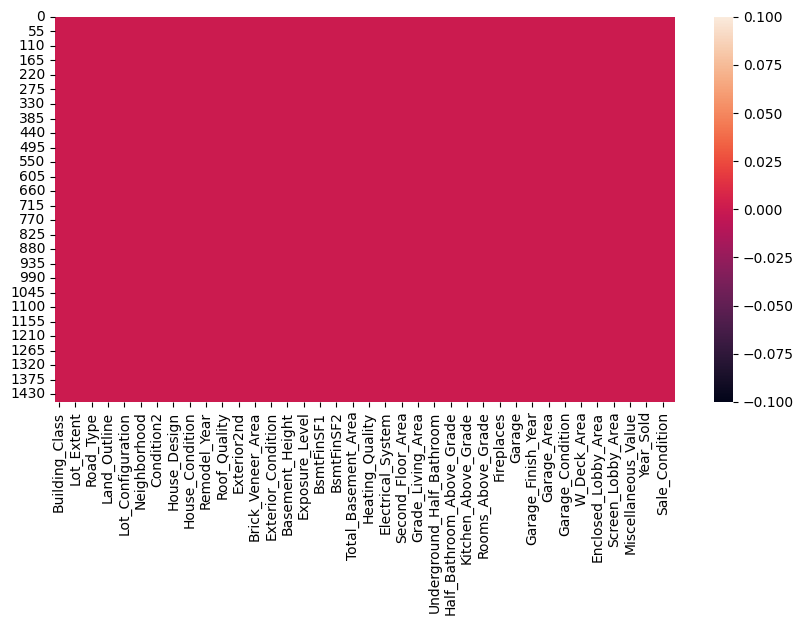

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())

<Axes: >

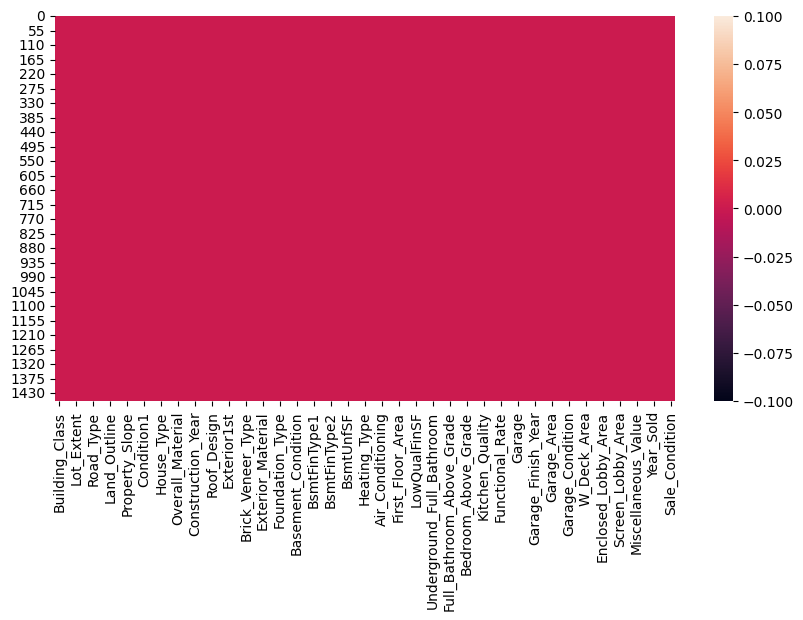

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data1.isnull())

In [ ]:
data_corr=data.corr()
data_corr

Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  \
Building_Class        1.000000      0.035882   -0.323486 -0.139852  -0.024937   
Zoning_Class          0.035882      1.000000   -0.090010 -0.034453   0.087656   
Lot_Extent           -0.323486     -0.090010    1.000000  0.236191  -0.035158   
Lot_Size             -0.139852     -0.034453    0.236191  1.000000  -0.197129   
Road_Type            -0.024937      0.087656   -0.035158 -0.197129   1.000000   
...                        ...           ...         ...       ...        ...   
Month_Sold           -0.013660     -0.031500    0.015635  0.001200   0.003695   
Year_Sold            -0.021330     -0.020623   -0.001966 -0.014256  -0.025050   
Sale_Type             0.012656      0.097450   -0.040627  0.012305   0.014326   
Sale_Condition       -0.024822      0.009500    0.062419  0.034178   0.006055   
Sale_Price           -0.084563     -0.166896    0.307643  0.263843   0.041057   

                Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
Building_Class        0.119793     -0.002752     -0.022865           0.076301   
Zoning_Class          0.061923     -0.017845     -0.001193          -0.009877   
Lot_Extent           -0.006461     -0.079325     -0.021705          -0.095525   
Lot_Size             -0.165317     -0.149076      0.010122          -0.121152   
Road_Type            -0.010259      0.115985      0.001683           0.013935   
...                        ...           ...           ...                ...   
Month_Sold           -0.033400     -0.011573     -0.051554           0.018954   
Year_Sold             0.036384      0.020478      0.023355          -0.006051   
Sale_Type            -0.001073     -0.025823     -0.126768           0.014197   
Sale_Condition       -0.038234      0.033766     -0.089698           0.051500   
Sale_Price           -0.255428      0.015545     -0.014323          -0.067234   

                Property_Slope  Neighborhood  Condition1  Condition2  \
Building_Class       -0.025814     -0.006511   -0.024790   -0.042425   
Zoning_Class         -0.022062     -0.249772   -0.027875    0.044605   
Lot_Extent            0.020304      0.086105   -0.025985   -0.010015   
Lot_Size              0.436867      0.044546    0.023845    0.022163   
Road_Type            -0.179353     -0.011526   -0.071656    0.002040   
...                        ...           ...         ...         ...   
Month_Sold            0.007053      0.023156   -0.009871    0.004046   
Year_Sold            -0.002283      0.036790   -0.009816   -0.021492   
Sale_Type             0.054910     -0.036779   -0.002330    0.004855   
Sale_Condition       -0.043064      0.021998    0.057753    0.045079   
Sale_Price            0.051091      0.210667    0.091150    0.007504   

                House_Type  House_Design  Overall_Material  House_Condition  \
Building_Class    0.746055      0.396980          0.032168        -0.059106   
Zoning_Class      0.005678     -0.105342         -0.160159         0.186972   
Lot_Extent       -0.366766      0.001378          0.230251        -0.058776   
Lot_Size         -0.205750     -0.033215          0.105797        -0.005621   
Road_Type        -0.018226      0.023730          0.058871         0.042834   
...                    ...           ...               ...              ...   
Month_Sold       -0.025800      0.025687          0.070766        -0.003480   
Year_Sold         0.002045     -0.017955         -0.027277         0.043916   
Sale_Type        -0.040221      0.048705         -0.060316         0.095193   
Sale_Condition   -0.003472      0.022834          0.193861         0.017705   
Sale_Price       -0.085720      0.180035          0.790972        -0.077754   

                Construction_Year  Remodel_Year  Roof_Design  Roof_Quality  \
Building_Class           0.027734      0.040029    -0.118151     -0.025797   
Zoning_Class            -0.308919     -0.174813    -0.000316      0.008385   
Lot_Extent            

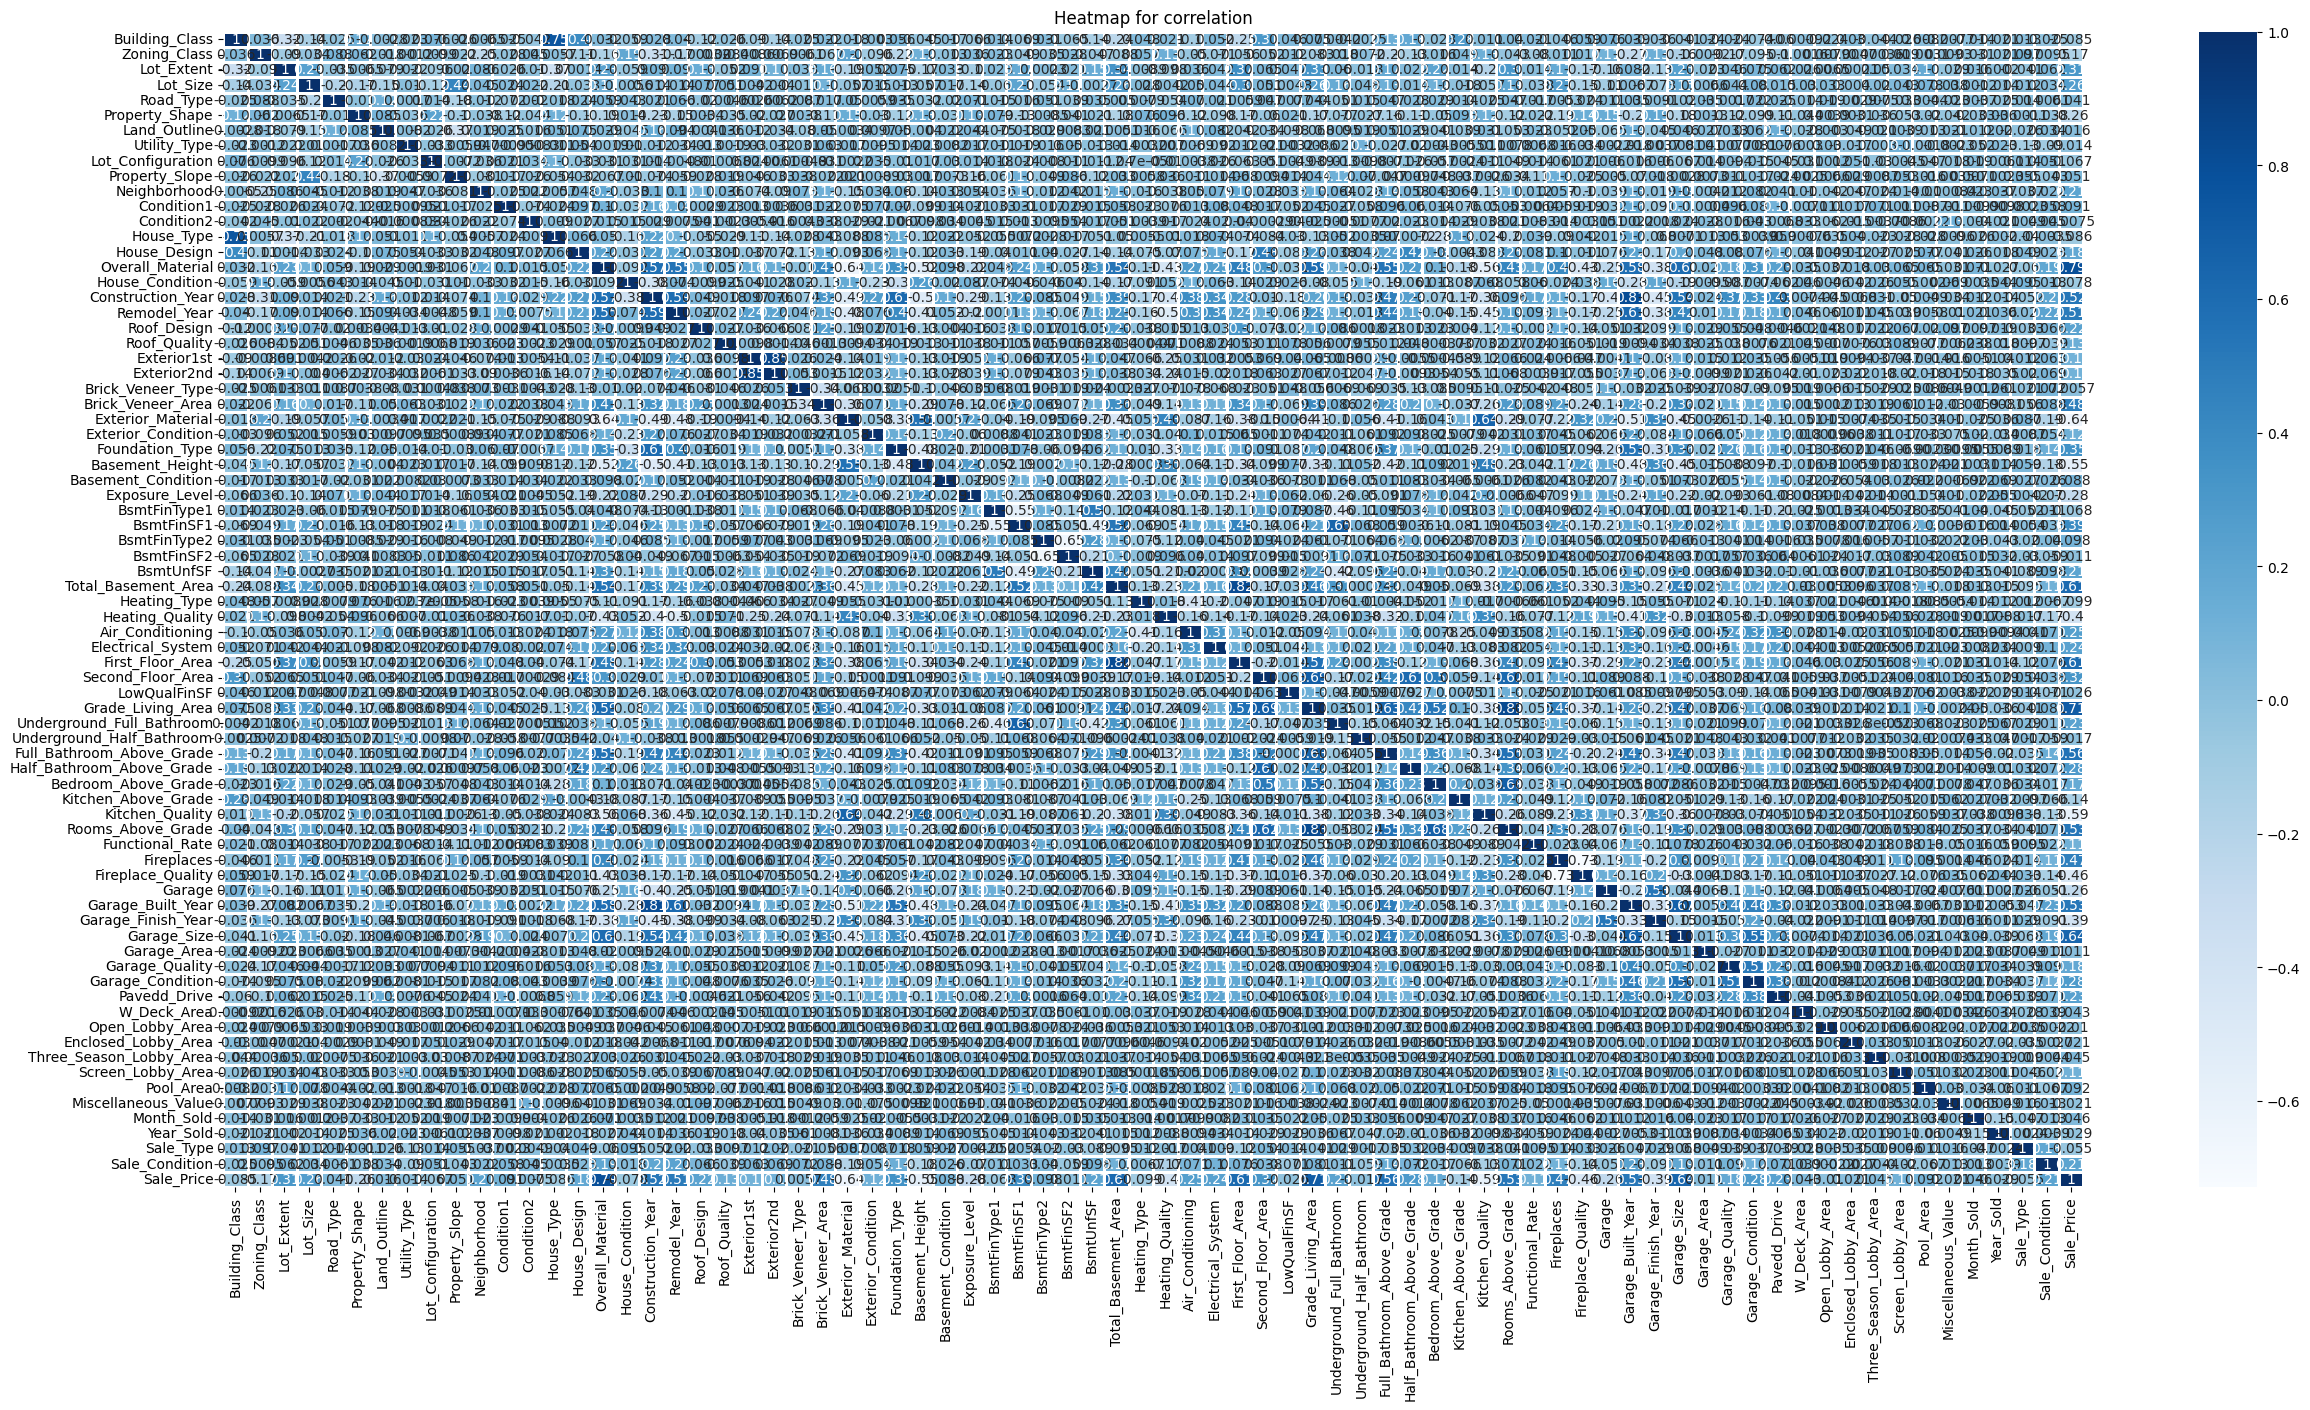

In [ ]:
plt.figure(figsize=(30,15))
Heatmap=sns.heatmap(data_corr,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap for correlation")
plt.show()

#Check model before EDA

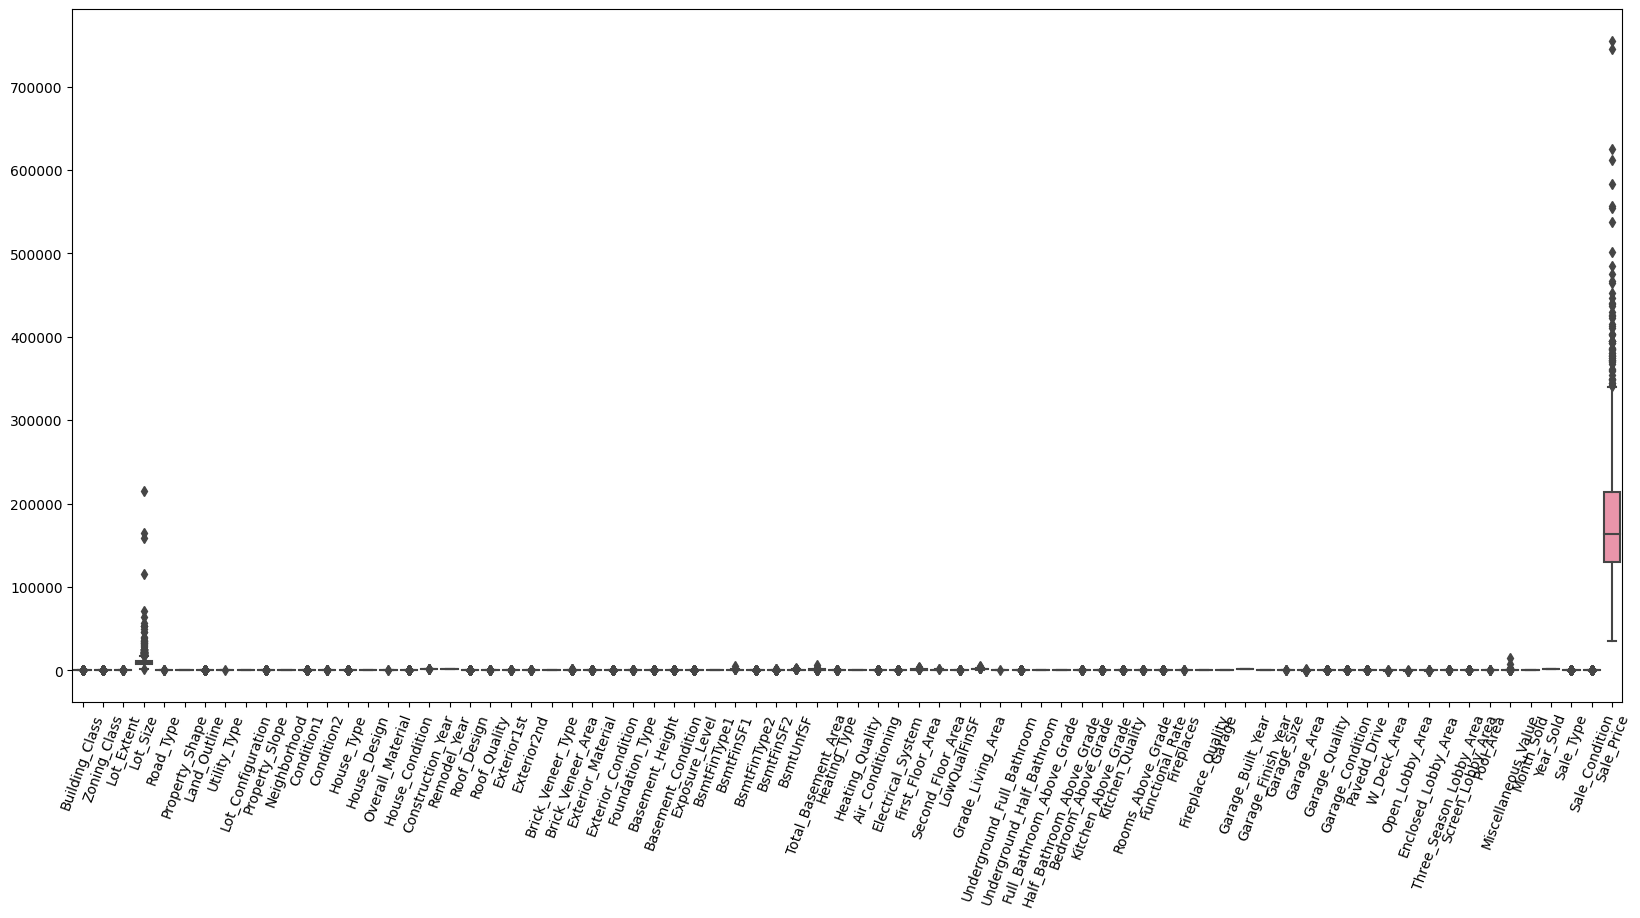

In [ ]:
plt.figure(figsize=(20,9))
sns.boxplot(data=data)
plt.xticks(rotation=70)
plt.show()

#Creating Base Model

In [ ]:
data.shape

(1459, 76)

In [ ]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [ ]:
x.shape,y.shape

((1459, 75), (1459,))

#Split Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1167, 75), (292, 75), (1167,), (292,))

#Linear Regression

In [ ]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [ ]:
lin.fit(x_train,y_train)

LinearRegression()

In [ ]:
lin_p=lin.predict(x_test)
lin_p

array([205170.47069374, 181225.53338489,  69600.77412848, 149676.02648873,
       167024.88650568, 180024.3904181 , 337382.2405293 , 190008.27127414,
       170302.00297136, 152460.30915614, 155281.68157972, 191866.54319902,
       228292.99879228, 145850.09680181,  98400.86271627, 104162.53561766,
       252541.63777393, 262078.27008584, 128879.78474223, 126514.29062225,
       115330.05991232, 396997.75000485, 176543.68078848, 216947.56308728,
        71732.89996283,  99873.10846174, 121387.35878425, 190491.65296291,
       118649.50628842, 117975.59375095, 220319.50642133, 134074.82596189,
       284260.4409709 , 219519.14964028, 135480.90191987, 119039.62316669,
       360237.22483991, 161201.3642751 , 380054.91227886, 215533.3432477 ,
       187904.21977436, 204148.30375803, 211852.54895714, 123900.23563664,
       239961.01430702, 198725.23247899, 112492.99120353, 119981.48982578,
       144163.85328609,  41021.82476169, 123205.29245624, 149173.08429906,
       122498.39022708, 1

In [ ]:
lin.coef_

array([-7.04332602e+01, -9.27440144e+02,  4.59791774e+01,  4.76447887e-01,
        3.02365031e+04, -8.29091301e+02,  1.00667526e+03, -3.48268404e+04,
       -2.91730648e+02,  8.91819391e+02,  2.57643613e+02, -1.64442492e+03,
       -1.20278911e+04, -2.08027793e+03, -5.15771401e+02,  9.29107754e+03,
        5.69780316e+03,  2.64133841e+02,  4.21000815e+00,  4.45452199e+02,
        4.70626847e+03, -5.14606939e+02,  8.58218597e+01,  5.71931534e+03,
        3.46094601e+01, -7.93952464e+03, -2.13051873e+02,  1.53651131e+03,
       -9.13929322e+03,  1.69932429e+03, -2.98854056e+03,  3.50806715e+02,
        1.94136114e+01,  6.71377321e+02,  1.14100410e+01, -3.32547590e+00,
        2.74981766e+01, -5.78476261e+03, -1.05538319e+03, -2.68070506e+03,
       -2.85319406e+02,  2.45674031e+01,  3.21992478e+01, -3.28084728e+01,
        2.39581779e+01,  5.03722342e+02, -3.11566859e+03, -2.18546331e+01,
        1.10759248e+03, -5.25618399e+03, -1.73604908e+04, -7.05095249e+03,
        2.29178570e+03,  

In [ ]:
lin.intercept_  

613588.7798315609

In [ ]:
R2=lin.score(x_train,y_train)
R2

0.8780987680158383

In [ ]:
Adj_R2=1-(((1-R2)*(1167-1))/(1167-75-1))
Adj_R2

0.8697187566512076

In [ ]:
from sklearn import metrics

In [ ]:
mse=metrics.mean_squared_error(y_test,lin_p)
mse

2185678906.068402

In [ ]:
rmse=pow(mse,0.5)
rmse

46751.24496811183

In [ ]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":lin_p})
df1

Actual      Predicted
666   129000  205170.470694
104   169500  181225.533385
528    86000   69600.774128
18    159000  149676.026489
1151  149900  167024.886506
...      ...            ...
189   286000  293158.060974
682   173000  180064.553544
175   243000  206501.918549
650   205950  197862.297405
824   232600  220813.811509

[292 rows x 2 columns]

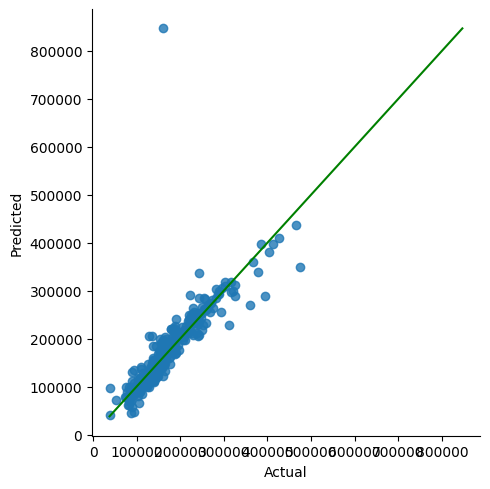

In [ ]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

#Lasso(L1)

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [ ]:
lasso.fit(x_train,y_train)

Lasso()

In [ ]:
l_p=lasso.predict(x_test)
l_p

array([205156.45086735, 181181.89399089,  69609.85589697, 149669.33663568,
       167024.78596458, 180027.13605433, 337376.45912675, 190022.19350381,
       170297.22909274, 152472.05787685, 155285.53443176, 191848.63376185,
       228263.21561416, 145865.26903034,  98375.99529104, 104162.98162995,
       252561.61373924, 262096.40477444, 128804.63076397, 126511.29474067,
       115353.95155042, 396980.33229417, 176527.14087239, 216949.1755531 ,
        71730.58574846,  99838.03432292, 121411.9546221 , 190497.54170193,
       118658.15889396, 117991.77829101, 220316.4042902 , 134059.39416973,
       284259.77634325, 219549.02269089, 135482.88625315, 119078.0492354 ,
       360187.40491753, 161178.03420356, 380043.20070604, 215550.97820271,
       187910.4976375 , 204151.72948293, 211858.37845879, 123898.50962385,
       239938.05504264, 198742.67562486, 112489.60760103, 119971.99295606,
       144160.87048904,  41038.72483226, 123212.16609075, 149175.34664531,
       122547.96352952, 1

In [ ]:
lasso.coef_    #feature selection

array([-7.05009946e+01, -9.25075012e+02,  4.60064491e+01,  4.76285651e-01,
        2.99854073e+04, -8.28519536e+02,  1.00146514e+03, -3.35381288e+04,
       -2.90444348e+02,  8.65277453e+02,  2.57102600e+02, -1.64387571e+03,
       -1.20151546e+04, -2.08080621e+03, -5.15934169e+02,  9.29069618e+03,
        5.69586629e+03,  2.64072036e+02,  4.25849500e+00,  4.45950970e+02,
        4.69227190e+03, -5.13540932e+02,  8.51941268e+01,  5.71929620e+03,
        3.45938842e+01, -7.93769411e+03, -2.11450313e+02,  1.53304968e+03,
       -9.14205855e+03,  1.69340968e+03, -2.98873907e+03,  3.49804831e+02,
        3.70718476e+01,  6.68532321e+02,  2.90391352e+01,  1.43276307e+01,
        9.86570623e+00, -5.74918874e+03, -1.05459649e+03, -2.63259831e+03,
       -2.79544685e+02,  4.19018289e+01,  4.95537733e+01, -1.54573686e+01,
        6.62839532e+00,  4.98439788e+02, -3.11366285e+03, -1.53481243e+01,
        1.10851956e+03, -5.25707206e+03, -1.73187485e+04, -7.05016653e+03,
        2.28535187e+03,  

In [ ]:
l_R2=lasso.score(x_train,y_train)
l_R2

0.8780984927426899

In [ ]:
l_Adj_R2=1-(((1-R2)*(1167-1))/(1167-75-1))
l_Adj_R2

0.8697187566512076

In [ ]:
l_mse=metrics.mean_squared_error(y_test,l_p)
l_mse

2186331689.75316

In [ ]:
l_df=pd.DataFrame({"Importances":list(lasso.coef_),"column":list(x_test)})
l_df

Importances               column
0     -70.500995       Building_Class
1    -925.075012         Zoning_Class
2      46.006449           Lot_Extent
3       0.476286             Lot_Size
4   29985.407342            Road_Type
..           ...                  ...
70     -0.164407  Miscellaneous_Value
71   -235.515541           Month_Sold
72   -521.550304            Year_Sold
73   -683.987258            Sale_Type
74   3074.077899       Sale_Condition

[75 rows x 2 columns]

In [ ]:
n_df1=pd.DataFrame({"Actual_n":y_test,"Predicted_n":l_p})
n_df1

Actual_n    Predicted_n
666     129000  205156.450867
104     169500  181181.893991
528      86000   69609.855897
18      159000  149669.336636
1151    149900  167024.785965
...        ...            ...
189     286000  293149.070275
682     173000  180084.574959
175     243000  206514.468939
650     205950  197854.201386
824     232600  220817.953395

[292 rows x 2 columns]

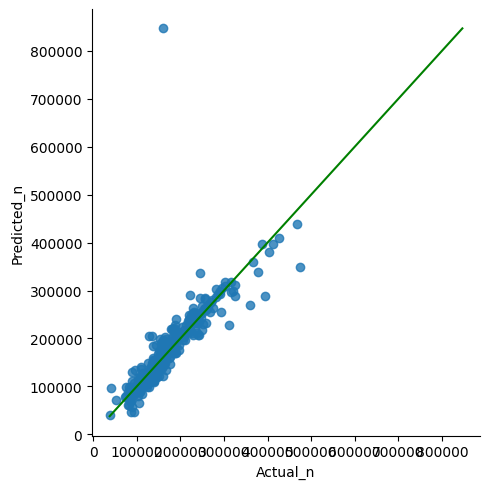

In [ ]:
sns.lmplot(x="Actual_n",y="Predicted_n",data=n_df1,fit_reg=False)
d_line=np.arange(n_df1.min().min(),n_df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rfr_p=rfr.predict(x_test)

In [ ]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.9816778883443334

In [ ]:
rf_adr=1-(((1-rf_rsq)*(1167-1))/(1167-75-1))
rf_adr

0.980418348129691

In [ ]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

867710568.3228465

In [ ]:
rf_df=pd.DataFrame({"Actual":y_test,"Predicted":rfr_p})
rf_df

Actual  Predicted
666   129000  205169.40
104   169500  171685.75
528    86000   94347.11
18    159000  151450.00
1151  149900  170674.40
...      ...        ...
189   286000  264122.63
682   173000  177477.30
175   243000  204780.50
650   205950  194131.53
824   232600  243219.08

[292 rows x 2 columns]

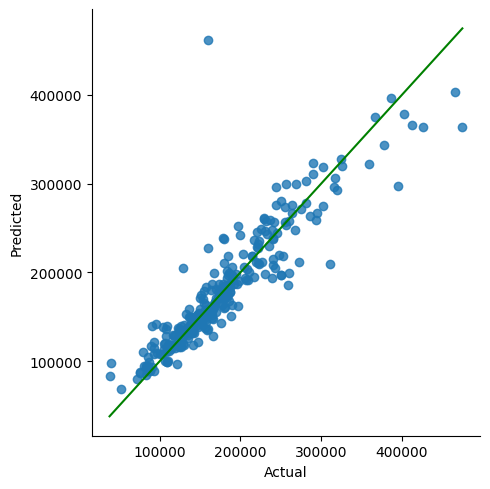

In [ ]:
sns.lmplot(x="Actual",y="Predicted",data=rf_df,fit_reg=False)
d_line=np.arange(rf_df.min().min(),rf_df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

#Boosting

#1.XG-Boost Regressor

In [ ]:
from xgboost import XGBRFRegressor
xgb=XGBRFRegressor()

In [ ]:
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [ ]:
xg_p=xgb.predict(x_test)

In [ ]:
xg_rsq=xgb.score(x_train,y_train)
xg_rsq

0.9481440745254126

In [ ]:
xg_adr=1-(((1-xg_rsq)*(1167-1))/(1167-75-1))
xg_adr

0.9445792767155189

In [ ]:
xg_mse=metrics.mean_squared_error(y_test,xg_p)
xg_mse

925586511.5383215

In [ ]:
xg_df=pd.DataFrame({"Actual":y_test,"Predicted":xg_p})
xg_df

Actual      Predicted
666   129000  187982.171875
104   169500  172853.078125
528    86000  101352.273438
18    159000  145329.531250
1151  149900  175162.593750
...      ...            ...
189   286000  277455.812500
682   173000  171933.656250
175   243000  191733.234375
650   205950  191328.718750
824   232600  241706.890625

[292 rows x 2 columns]

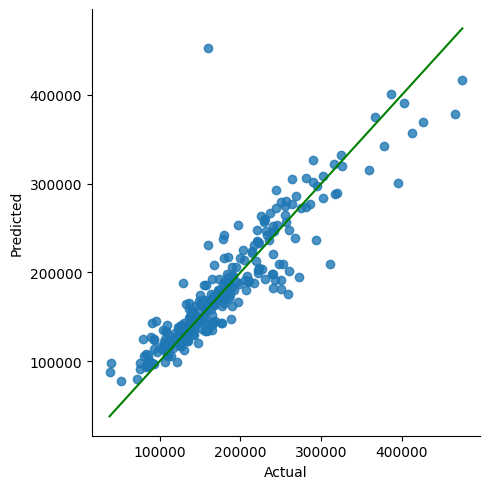

In [ ]:
sns.lmplot(x="Actual",y="Predicted",data=xg_df,fit_reg=False)
d_line=np.arange(xg_df.min().min(),xg_df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

#AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [ ]:
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [ ]:
ad_p=ad.predict(x_test)

In [ ]:
ad_rsq=ad.score(x_train,y_train)
ad_rsq

0.8869064300363306

In [ ]:
ad_adr=1-(((1-ad_rsq)*(1167-1))/(1167-75-1))
ad_adr

0.8791318949792498

In [ ]:
ad_MSE=metrics.mean_squared_error(y_test,ad_p)
ad_MSE

1105038110.115135

#Final result before EDA

In [ ]:
l1=["Linear Regression","Random Forest Regressor","XG-Boost Regressor","AdaBoostRegressor"]
l2=[R2,rf_rsq,xg_rsq,ad_rsq]
l3=[Adj_R2,rf_adr,xg_adr,ad_adr]
l4=[mse,rfr_MSE,xg_mse,ad_MSE]

In [ ]:
before_eda=pd.DataFrame({"Model_Name":l1,"R-square":l2,"Adj_R2":l3,"MSE":l4})
before_eda

Model_Name  R-square    Adj_R2           MSE
0        Linear Regression  0.878099  0.869719  2.185679e+09
1  Random Forest Regressor  0.981678  0.980418  8.677106e+08
2       XG-Boost Regressor  0.948144  0.944579  9.255865e+08
3        AdaBoostRegressor  0.886906  0.879132  1.105038e+09

# Model building after EDA

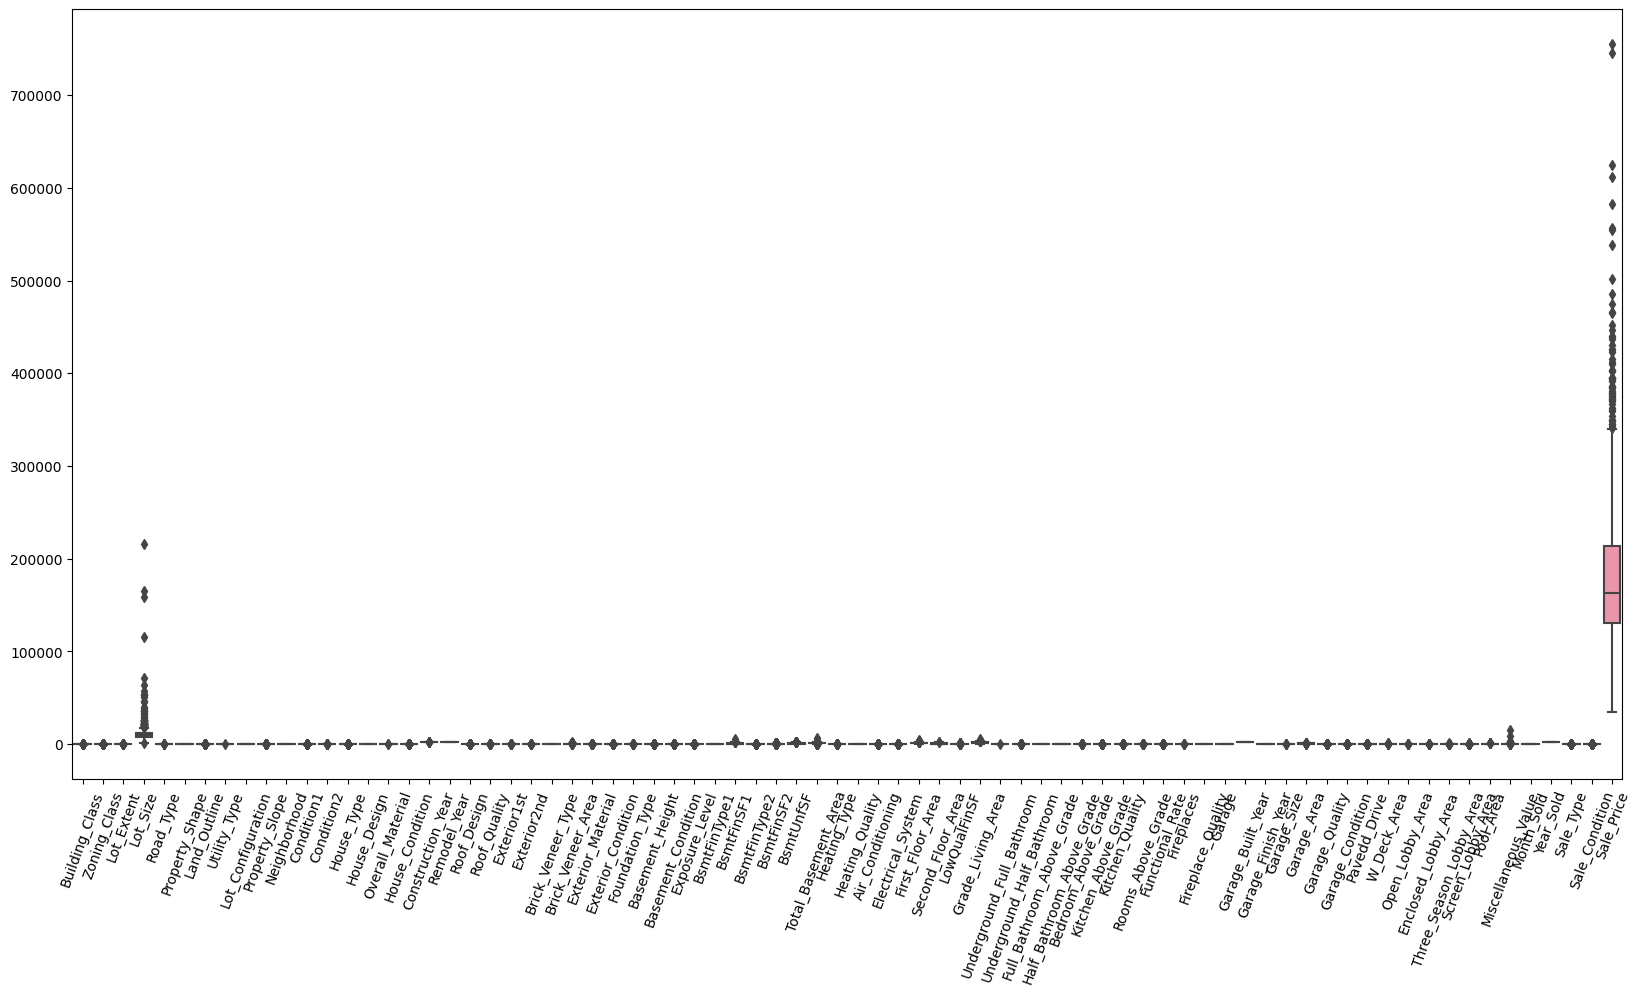

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.xticks(rotation = 70)
plt.show()

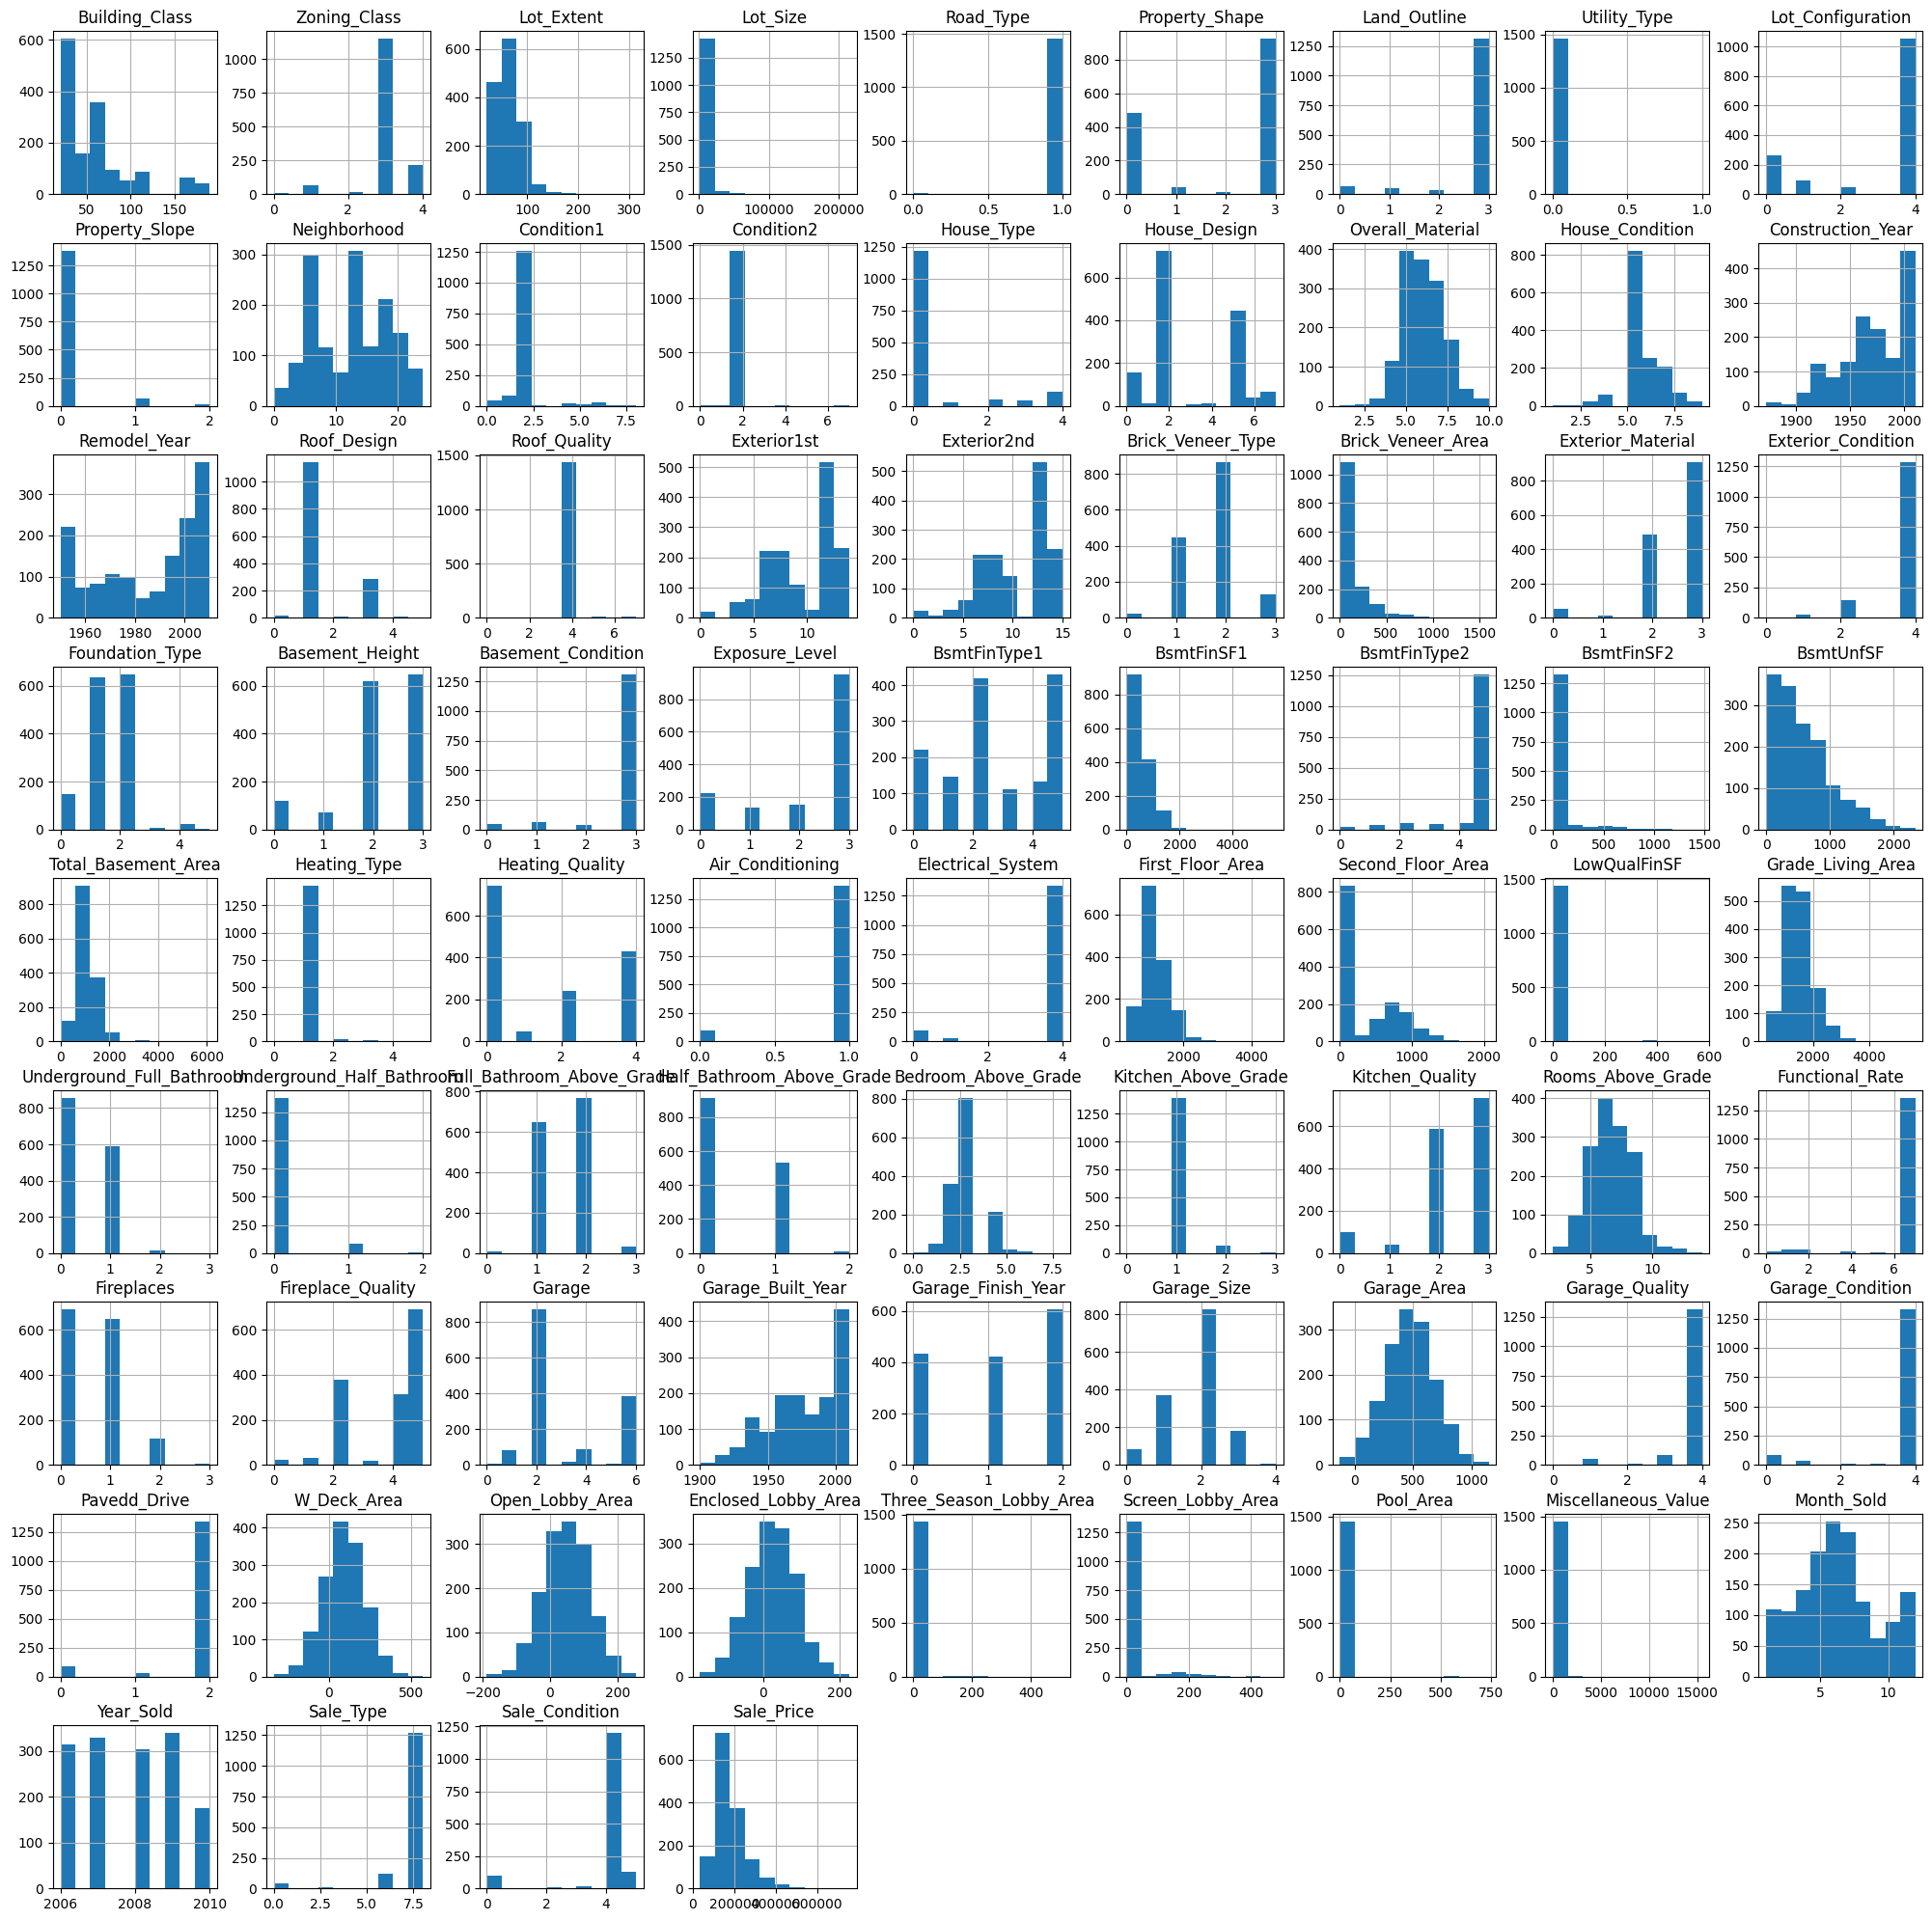

In [ ]:
data.hist(figsize=(25,25))
plt.show()

#for building_class

In [ ]:
data.Building_Class.describe() #Numerical col

count    1459.000000
mean       56.922550
std        42.304033
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: Building_Class, dtype: float64

In [ ]:
data.Building_Class.value_counts()

20     535
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: Building_Class, dtype: int64

<Axes: ylabel='Building_Class'>

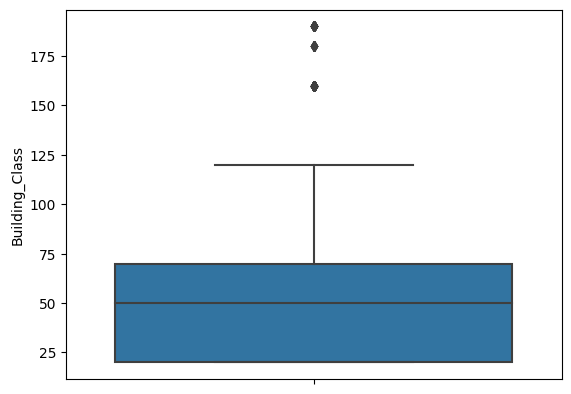

In [ ]:
sns.boxplot(y = data.Building_Class, data = data)

(array([604., 160., 359.,  94.,  52.,  87.,   0.,   0.,  63.,  40.]),
 array([ 20.,  37.,  54.,  71.,  88., 105., 122., 139., 156., 173., 190.]),
 <BarContainer object of 10 artists>)

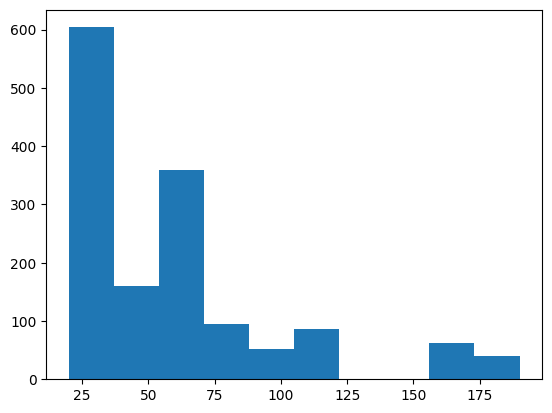

In [ ]:
plt.hist(data.Building_Class)

<Axes: xlabel='Building_Class', ylabel='Density'>

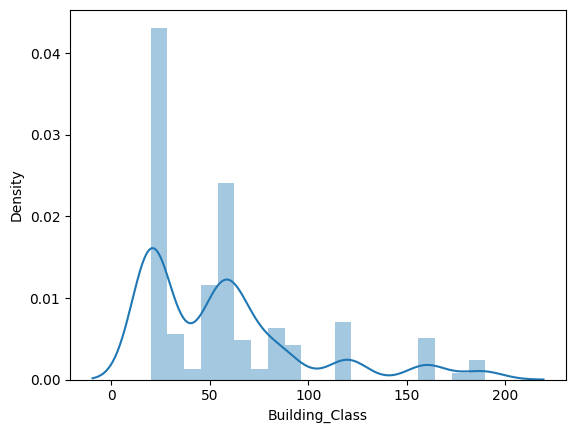

In [ ]:
sns.distplot(data.Building_Class)

In [ ]:
iqr=data.Building_Class.quantile(0.75)-data.Building_Class.quantile(0.25)
iqr

50.0

In [ ]:
lb=data["Building_Class"].mean()-2*data["Building_Class"].std()
ub=data["Building_Class"].mean()+2*data["Building_Class"].std()
print(lb,ub)

-27.685515445194795 141.53061482833394


In [ ]:
data.loc[data["Building_Class"]>141.53061482833385,"Building_Class"]=141.53061482833385

<Axes: xlabel='Building_Class', ylabel='Density'>

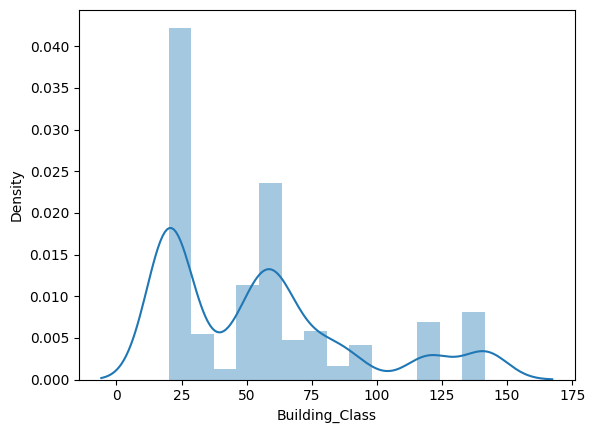

In [ ]:
sns.distplot(data.Building_Class)

#for Zoning_Class

In [ ]:
#data.Zoning_Class.describe()

In [ ]:
 #sns.boxplot(y = data.Zoning_Class, data = data)#catgorical data

In [ ]:
#plt.hist(data.Zoning_Class)

In [ ]:
#sns.distplot(data.Zoning_Class)

In [ ]:
#data.Zoning_Class.value_counts

#for Lot_Extent

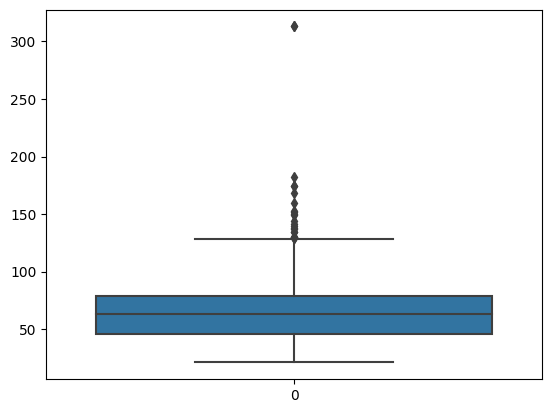

In [ ]:
sns.boxplot(data=data.Lot_Extent)
plt.show()

(array([464., 642., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

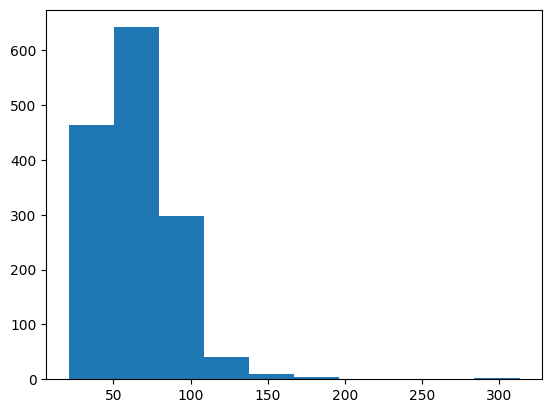

In [ ]:
plt.hist(data.Lot_Extent)

<Axes: xlabel='Lot_Extent', ylabel='Density'>

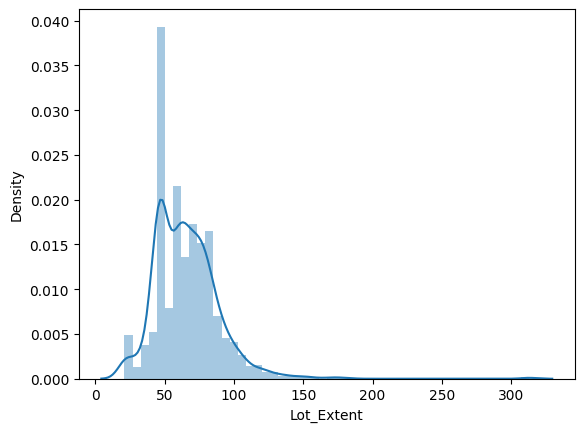

In [ ]:
sns.distplot(data.Lot_Extent)

In [ ]:
data.Lot_Extent.value_counts()

46.0     260
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
111.0      1
150.0      1
141.0      1
140.0      1
153.0      1
Name: Lot_Extent, Length: 110, dtype: int64

In [ ]:
iqr=data.Lot_Extent.quantile(0.75)-data.Lot_Extent.quantile(0.25)
iqr

33.0

In [ ]:
data["Lot_Extent"].describe()

count    1459.000000
mean       65.777245
std        23.871579
min        21.000000
25%        46.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: Lot_Extent, dtype: float64

In [ ]:
lb=data["Lot_Extent"].quantile(0.25)-iqr*3
ub=data["Lot_Extent"].quantile(0.75)+iqr*3
print(lb,ub)

-53.0 178.0


In [ ]:
data.loc[data["Lot_Extent"]>178.0,"Lot_Extent"]=178.0

<Axes: xlabel='Lot_Extent', ylabel='Density'>

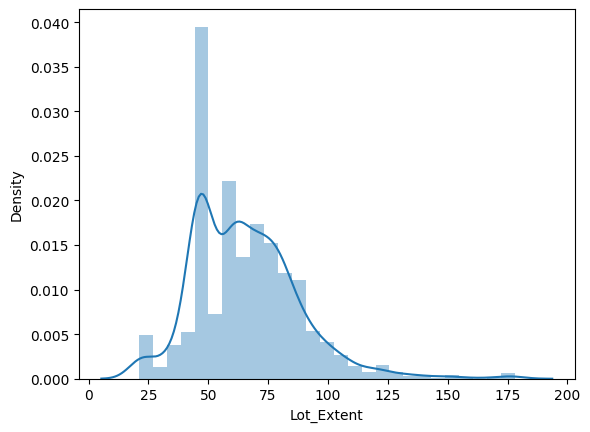

In [ ]:
sns.distplot(data.Lot_Extent)

#for Lot_Size

<Axes: ylabel='Lot_Size'>

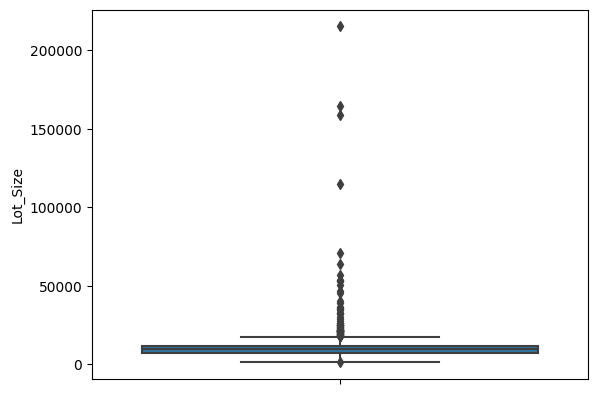

In [ ]:
sns.boxplot(y = data.Lot_Size, data = data)

(array([1.422e+03, 2.400e+01, 8.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  1300. ,  22694.5,  44089. ,  65483.5,  86878. , 108272.5,
        129667. , 151061.5, 172456. , 193850.5, 215245. ]),
 <BarContainer object of 10 artists>)

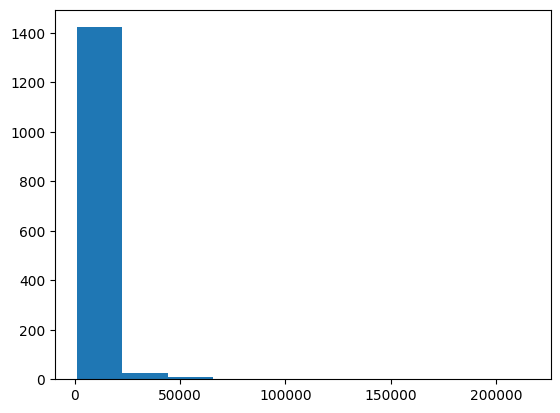

In [ ]:
plt.hist(data.Lot_Size)

<Axes: xlabel='Lot_Size', ylabel='Density'>

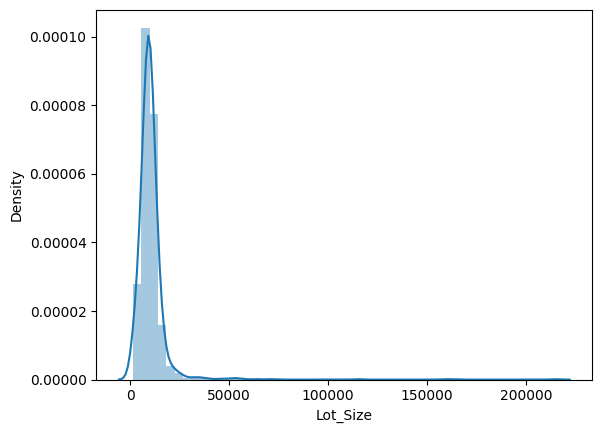

In [ ]:
sns.distplot(data.Lot_Size)

In [ ]:
data.Lot_Size.value_counts()

7200     25
9600     24
6000     17
8400     14
10800    14
         ..
11423     1
14601     1
4058      1
17104     1
9717      1
Name: Lot_Size, Length: 1073, dtype: int64

In [ ]:
iqr=data.Lot_Size.quantile(0.75)-data.Lot_Size.quantile(0.25)
iqr

4054.0

In [ ]:
data["Lot_Size"].describe()

count      1459.000000
mean      10517.225497
std        9984.675721
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: Lot_Size, dtype: float64

In [ ]:
lb=data["Lot_Size"].quantile(0.25)-iqr*3
ub=data["Lot_Size"].quantile(0.75)+iqr*3
print(lb,ub)

-4613.0 23765.0


In [ ]:
data.loc[data["Lot_Size"]>23765.0,"Lot_Size"]=23765.0

In [ ]:
data.loc[data["Lot_Size"]<-4613.0,"Lot_Size"]=-4613.0

#For Road_Type

In [ ]:
 #sns.boxplot(y = data.Road_Type, data = data)#categorical data

In [ ]:
#data.Road_Type.value_counts()

#Property_Shape

In [ ]:
#sns.boxplot(y = data.Property_Shape, data = data)#categrical data

#Land_Outline

In [ ]:
#sns.boxplot(y = data.Land_Outline, data = data)#categrical data

In [ ]:
#data.Land_Outline.value_counts()

#Utility_Type

In [ ]:
#sns.boxplot(y = data.Utility_Type, data = data)#categrical data

In [ ]:
#data.Utility_Type.value_counts()

#Lot_Configuration

In [ ]:
#sns.boxplot(y = data.Lot_Configuration, data = data)#categrical data

In [ ]:
#data.Lot_Configuration.value_counts()

#Property_Slope

In [ ]:
#sns.boxplot(y = data.Property_Slope, data = data)#categrical data

In [ ]:
#sns.boxplot(y = data.Property_Slope, data = data)#categrical data

#Neighborhood

In [ ]:
#sns.boxplot(y = data.Neighborhood, data = data)#no out layer

#Condition1

In [ ]:
#sns.boxplot(y = data.Condition1, data = data)#categrical data

In [ ]:
#data.Condition1.value_counts()

#Condition2

In [ ]:
#sns.boxplot(y = data.Condition2, data = data)#categrical data

In [ ]:
#data.Condition2.value_counts()

#House_Type

In [ ]:
#sns.boxplot(y = data.House_Type, data = data)#categrical data

In [ ]:
#data.House_Type.value_counts()

#House_Design

In [ ]:
#sns.boxplot(y = data.House_Design, data = data)#categrical data

#Overall_Material

In [ ]:
#sns.boxplot(y = data.Overall_Material, data = data)#categrical data

In [ ]:
##plt.hist(data.Overall_Material)

In [ ]:
#sns.distplot(data.Overall_Material)

In [ ]:
#data.Overall_Material.value_counts()

#House_Condition

In [ ]:
#sns.boxplot(y = data.House_Condition, data = data)#categrical data

#Construction_Year

In [ ]:
#sns.boxplot(y = data.Construction_Year, data = data)#not doing out layer treatment in Construction_Year

#Remodel_Year

In [ ]:
#sns.boxplot(y = data.Remodel_Year, data = data)#not doing out layer treatment in Remodel_Year

#Roof_Design

In [ ]:
#sns.boxplot(y = data.Roof_Design, data = data)#categrical data

In [ ]:
#data.Roof_Design.value_counts()

#Roof_Quality

In [ ]:
#sns.boxplot(y = data.Roof_Quality, data = data)#categrical data

In [ ]:
#data.Roof_Quality.value_counts()

#Exterior1st

In [ ]:
#sns.boxplot(y = data.Exterior1st, data = data)#categrical data

#Exterior2nd

In [ ]:
#sns.boxplot(y = data.Exterior1st, data = data)#categrical data

#Exterior2nd

In [ ]:
#sns.boxplot(y = data.Exterior2nd, data = data)#categrical data

#Brick_Veneer_Type

In [ ]:
#sns.boxplot(y = data.Brick_Veneer_Type, data = data)#categrical data

#Brick_Veneer_Area

In [ ]:
#sns.boxplot(y = data.Brick_Veneer_Area, data = data)#categrical data

#Exterior_Material

In [ ]:
#sns.boxplot(y = data.Exterior_Material, data = data)#categrical data

#Exterior_Condition

In [ ]:
#sns.boxplot(y = data.Exterior_Condition, data = data)#categrical data

In [ ]:
#data.Exterior_Condition.value_counts()

#Foundation_Type

In [ ]:
##sns.boxplot(y = data.Foundation_Type, data = data)#categrical data

#Basement_Height

In [ ]:
#sns.boxplot(y = data.Basement_Height, data = data)#categrical data

#Basement_Condition

In [ ]:
#sns.boxplot(y = data.Basement_Condition, data = data)#categrical data

In [ ]:
#data.Basement_Condition.value_counts()

#Exposure_Level

In [ ]:
#sns.boxplot(y = data.Exposure_Level, data = data)#categrical data

#BsmtFinType1

In [ ]:
#sns.boxplot(y = data.BsmtFinType1, data = data)#no out layer

#BsmtFinType2

In [ ]:
#sns.boxplot(y = data.BsmtFinType2, data = data)#categrical data

In [ ]:
#data.BsmtFinType2.value_counts()

#BsmtFinSF1

<Axes: ylabel='BsmtFinSF1'>

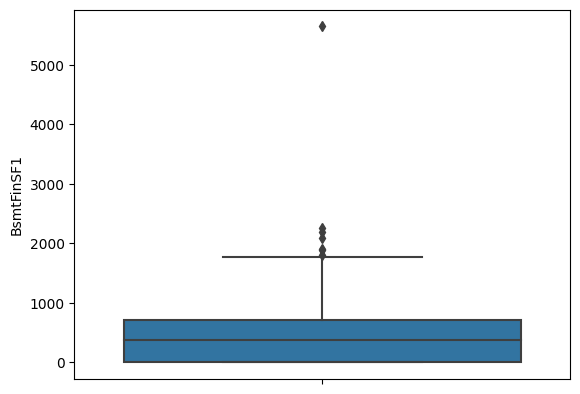

In [ ]:
sns.boxplot(y = data.BsmtFinSF1, data = data)

(array([919., 416., 114.,   8.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   0. ,  564.4, 1128.8, 1693.2, 2257.6, 2822. , 3386.4, 3950.8,
        4515.2, 5079.6, 5644. ]),
 <BarContainer object of 10 artists>)

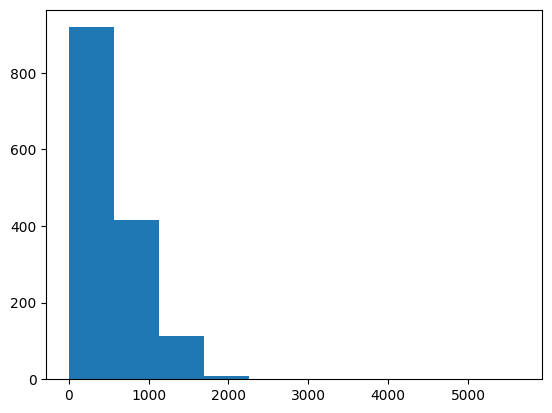

In [ ]:
plt.hist(data.BsmtFinSF1)

<Axes: xlabel='BsmtFinSF1', ylabel='Density'>

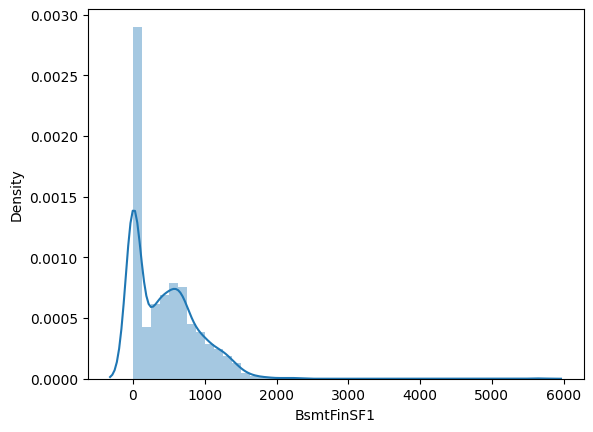

In [ ]:
sns.distplot(data.BsmtFinSF1)

In [ ]:
data.BsmtFinSF1.value_counts()

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
49        1
Name: BsmtFinSF1, Length: 636, dtype: int64

In [ ]:
data["BsmtFinSF1"].describe()

count    1459.000000
mean      443.374914
std       456.142186
min         0.000000
25%         0.000000
50%       383.000000
75%       712.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [ ]:
iqr=data.BsmtFinSF1.quantile(0.75)-data.BsmtFinSF1.quantile(0.25)
iqr

712.0

In [ ]:
lb=data["BsmtFinSF1"].quantile(0.25)-iqr*3
ub=data["BsmtFinSF1"].quantile(0.75)+iqr*3
print(lb,ub)

-2136.0 2848.0


In [ ]:
data.loc[data["BsmtFinSF1"]>2848.0,"BsmtFinSF1"]=2848.0

#BsmtFinSF2

In [ ]:
#sns.boxplot(y = data.BsmtFinSF2, data = data)#categrical data

In [ ]:
#data["BsmtFinSF2"].describe()

#BsmtUnfSF

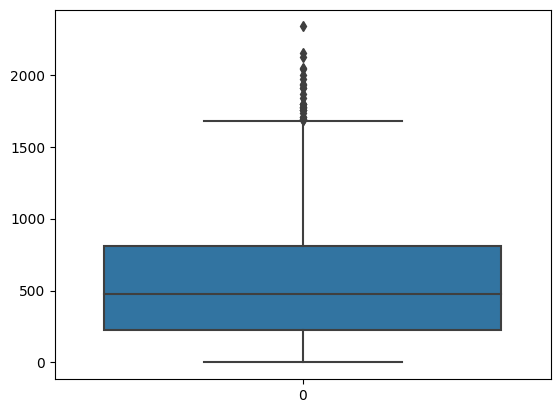

In [ ]:
sns.boxplot(data=data.BsmtUnfSF)
plt.show()

(array([374., 346., 256., 216., 106.,  72.,  53.,  24.,   9.,   3.]),
 array([   0. ,  233.6,  467.2,  700.8,  934.4, 1168. , 1401.6, 1635.2,
        1868.8, 2102.4, 2336. ]),
 <BarContainer object of 10 artists>)

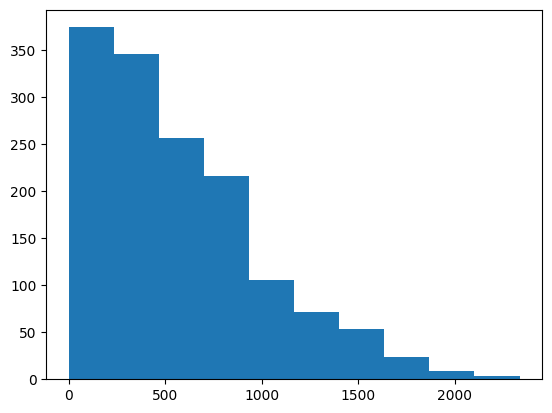

In [ ]:
plt.hist(data.BsmtUnfSF)

<Axes: xlabel='BsmtUnfSF', ylabel='Density'>

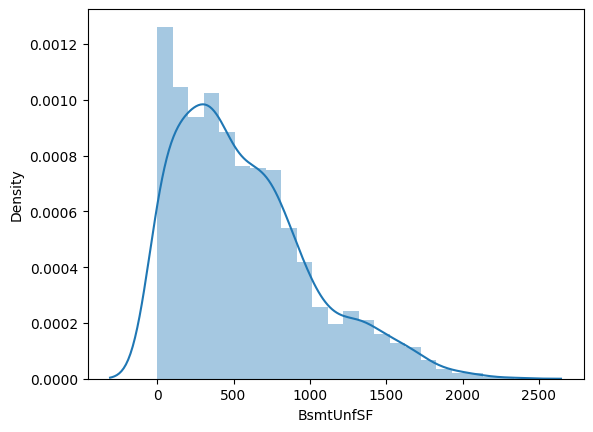

In [ ]:
sns.distplot(data.BsmtUnfSF)

In [ ]:
data.BsmtUnfSF.value_counts()

0       118
728       9
384       8
300       7
600       7
       ... 
551       1
1257      1
605       1
467       1
877       1
Name: BsmtUnfSF, Length: 779, dtype: int64

In [ ]:
iqr=data.BsmtUnfSF.quantile(0.75)-data.BsmtUnfSF.quantile(0.25)
iqr

584.5

In [ ]:
data["BsmtUnfSF"].describe()

count    1459.000000
mean      567.535984
std       441.874057
min         0.000000
25%       223.500000
50%       479.000000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [ ]:
lb=data["BsmtUnfSF"].mean()-2*data["BsmtUnfSF"].std()
ub=data["BsmtUnfSF"].mean()+2*data["BsmtUnfSF"].std()
print(lb,ub)

-316.21213066831 1451.284097769064


In [ ]:
data.loc[data["BsmtUnfSF"]>1451.2840977690635,"BsmtUnfSF"]=1451.2840977690635

#Total_Basement_Area

<Axes: ylabel='Total_Basement_Area'>

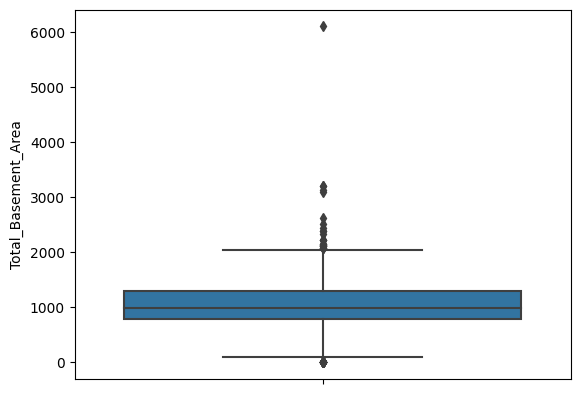

In [ ]:
sns.boxplot(y = data.Total_Basement_Area, data = data)

(array([121., 907., 371.,  52.,   3.,   4.,   0.,   0.,   0.,   1.]),
 array([   0.,  611., 1222., 1833., 2444., 3055., 3666., 4277., 4888.,
        5499., 6110.]),
 <BarContainer object of 10 artists>)

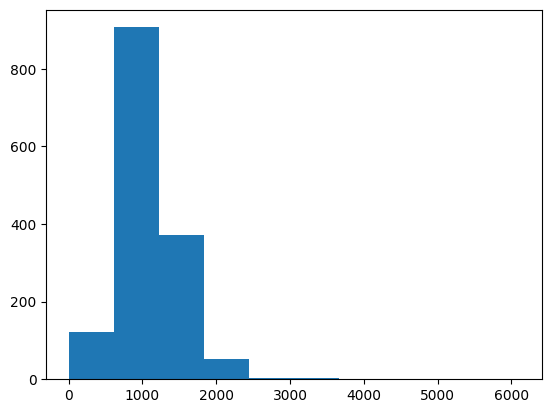

In [ ]:
plt.hist(data.Total_Basement_Area)

<Axes: xlabel='Total_Basement_Area', ylabel='Density'>

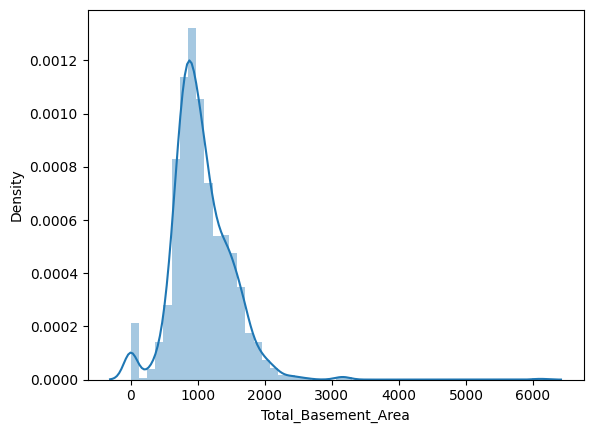

In [ ]:
sns.distplot(data.Total_Basement_Area)

In [ ]:
data.Total_Basement_Area.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: Total_Basement_Area, Length: 721, dtype: int64

In [ ]:
iqr=data.Total_Basement_Area.quantile(0.75)-data.Total_Basement_Area.quantile(0.25)
iqr

503.0

In [ ]:
data["Total_Basement_Area"].describe()

count    1459.000000
mean     1057.293352
std       438.824912
min         0.000000
25%       795.500000
50%       991.000000
75%      1298.500000
max      6110.000000
Name: Total_Basement_Area, dtype: float64

In [ ]:
lb=data["Total_Basement_Area"].quantile(0.25)-iqr*3
ub=data["Total_Basement_Area"].quantile(0.75)+iqr*3
print(lb,ub)

-713.5 2807.5


In [ ]:
data.loc[data["Total_Basement_Area"]>2807.5,"Total_Basement_Area"]=2807.5

In [ ]:
data.loc[data["Total_Basement_Area"]<-713.5,"Total_Basement_Area"]=-713.5

#Heating_Type

In [ ]:
#sns.boxplot(y = data.Heating_Type, data = data)#categrical data

In [ ]:
#data.Heating_Type.value_counts()

#Heating_Quality

In [ ]:
#sns.boxplot(y = data.Heating_Quality, data = data)#categrical data

In [ ]:
#data.Heating_Quality.value_counts()

#Air_Conditioning

In [ ]:
#sns.boxplot(y = data.Air_Conditioning, data = data)#categrical data

In [ ]:
#data.Air_Conditioning.value_counts()

#Electrical_System

In [ ]:
#sns.boxplot(y = data.Electrical_System, data = data)#categrical data

In [ ]:
#data.Electrical_System.value_counts()

#First_Floor_Area

<Axes: ylabel='First_Floor_Area'>

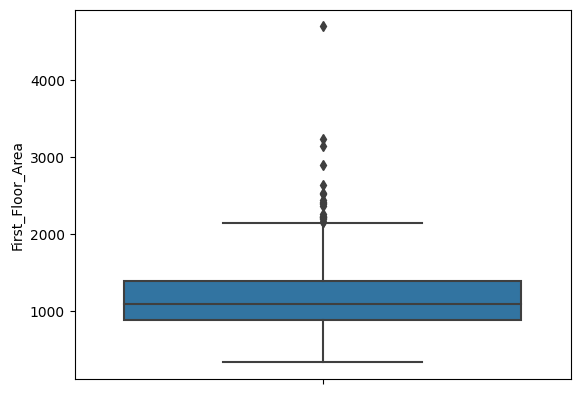

In [ ]:
sns.boxplot(y = data.First_Floor_Area, data = data)

(array([165., 735., 384., 147.,  21.,   4.,   2.,   0.,   0.,   1.]),
 array([ 334. ,  769.8, 1205.6, 1641.4, 2077.2, 2513. , 2948.8, 3384.6,
        3820.4, 4256.2, 4692. ]),
 <BarContainer object of 10 artists>)

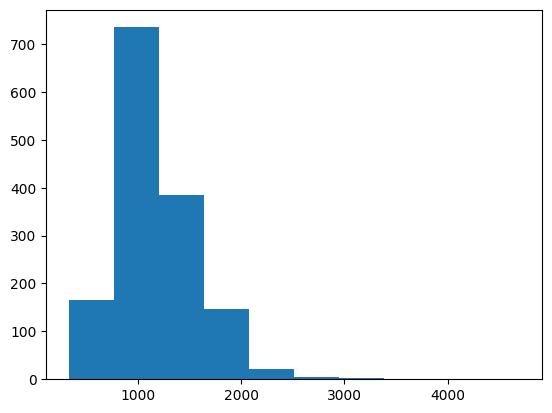

In [ ]:
plt.hist(data.First_Floor_Area)

<Axes: xlabel='First_Floor_Area', ylabel='Density'>

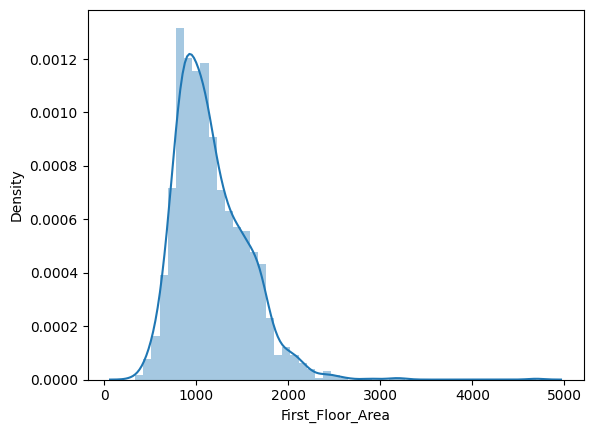

In [ ]:
sns.distplot(data.First_Floor_Area)

In [ ]:
data.First_Floor_Area.value_counts()

864     25
1040    16
912     14
848     12
894     12
        ..
1509     1
2515     1
605      1
3138     1
2073     1
Name: First_Floor_Area, Length: 752, dtype: int64

In [ ]:
iqr=data.First_Floor_Area.quantile(0.75)-data.First_Floor_Area.quantile(0.25)
iqr

509.5

In [ ]:
data["First_Floor_Area"].describe()

count    1459.000000
mean     1162.562714
std       386.712553
min       334.000000
25%       882.000000
50%      1086.000000
75%      1391.500000
max      4692.000000
Name: First_Floor_Area, dtype: float64

In [ ]:
lb=data["First_Floor_Area"].quantile(0.25)-iqr*3
ub=data["First_Floor_Area"].quantile(0.75)+iqr*3
print(lb,ub)

-646.5 2920.0


In [ ]:
data.loc[data["First_Floor_Area"]>2920.0,"First_Floor_Area"]=2920.0

#Second_Floor_Area

In [ ]:
#sns.boxplot(y = data.Second_Floor_Area, data = data)#categrical data

In [ ]:
#data["Second_Floor_Area"].describe()

In [ ]:
#data.Second_Floor_Area.value_counts()

#LowQualFinSF

In [ ]:
#sns.boxplot(y = data.LowQualFinSF, data = data)#categrical data

In [ ]:
#data["LowQualFinSF"].describe()

In [ ]:
#data.LowQualFinSF.value_counts()

#Grade_Living_Area

<Axes: ylabel='Grade_Living_Area'>

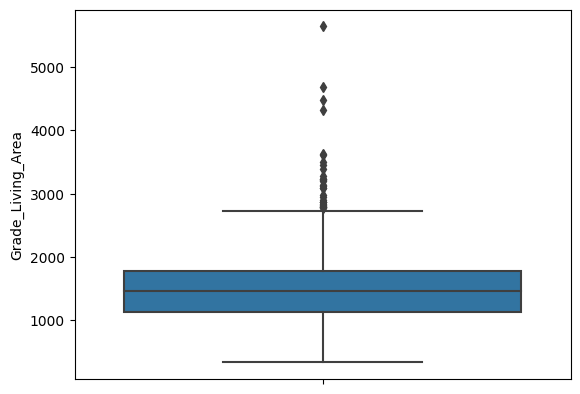

In [ ]:
sns.boxplot(y = data.Grade_Living_Area, data = data)

(array([107., 553., 535., 189.,  57.,  12.,   2.,   2.,   1.,   1.]),
 array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
        4580.4, 5111.2, 5642. ]),
 <BarContainer object of 10 artists>)

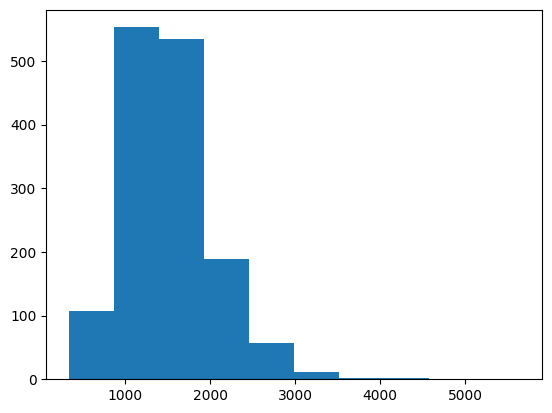

In [ ]:
plt.hist(data.Grade_Living_Area)

<Axes: xlabel='Grade_Living_Area', ylabel='Density'>

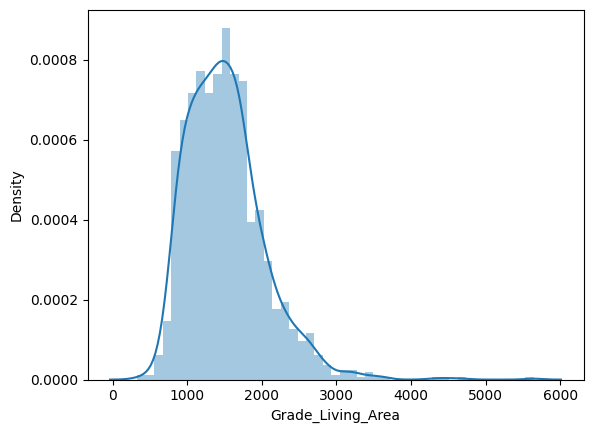

In [ ]:
sns.distplot(data.Grade_Living_Area)

In [ ]:
data.Grade_Living_Area.value_counts()

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
2340     1
Name: Grade_Living_Area, Length: 860, dtype: int64

In [ ]:
iqr=data.Grade_Living_Area.quantile(0.75)-data.Grade_Living_Area.quantile(0.25)
iqr

648.5

In [ ]:
data["Grade_Living_Area"].describe()

count    1459.000000
mean     1515.641535
std       525.616607
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1777.500000
max      5642.000000
Name: Grade_Living_Area, dtype: float64

In [ ]:
lb=data["Grade_Living_Area"].quantile(0.25)-iqr*3
ub=data["Grade_Living_Area"].quantile(0.75)+iqr*3
print(lb,ub)

-816.5 3723.0


In [ ]:
data.loc[data["Grade_Living_Area"]>3723.0,"Grade_Living_Area"]=3723.0

#Underground_Full_Bathroom

In [ ]:
#sns.boxplot(y = data.Underground_Full_Bathroom, data = data)#categrical data

#Underground_Half_Bathroom

In [ ]:
#sns.boxplot(y = data.Underground_Half_Bathroom, data = data)#categrical data

In [ ]:
#data.Underground_Half_Bathroom.value_counts()

#Full_Bathroom_Above_Grade

In [ ]:
#sns.boxplot(y = data.Full_Bathroom_Above_Grade, data = data)#categrical data

#Half_Bathroom_Above_Grade

In [ ]:
#sns.boxplot(y = data.Half_Bathroom_Above_Grade, data = data)#categrical data

#Bedroom_Above_Grade

In [ ]:
#sns.boxplot(y = data.Bedroom_Above_Grade, data = data)#categrical data

In [ ]:
#data.Bedroom_Above_Grade.value_counts()

#Kitchen_Above_Grade

In [ ]:
#sns.boxplot(y = data.Kitchen_Above_Grade, data = data)#categrical data

In [ ]:
#data.Kitchen_Above_Grade.value_counts()

#Kitchen_Quality

In [ ]:
#sns.boxplot(y = data.Kitchen_Quality, data = data)#categrical data

In [ ]:
#data.Kitchen_Quality.value_counts()

#Rooms_Above_Grade

In [ ]:
#sns.boxplot(y = data.Rooms_Above_Grade, data = data)#categrical data

In [ ]:
#data.Rooms_Above_Grade.value_counts()

#Functional_Rate

In [ ]:
#sns.boxplot(y = data.Functional_Rate, data = data)#categrical data

In [ ]:
#data.Functional_Rate.value_counts()

#Fireplaces

In [ ]:
#sns.boxplot(y = data.Fireplaces, data = data)#categrical data

In [ ]:
#data.Fireplaces.value_counts()

#Fireplace_Quality

In [ ]:
#sns.boxplot(y = data.Fireplace_Quality, data = data)#no out layer

#Garage

In [ ]:
#sns.boxplot(y = data.Garage, data = data)#categrical data

In [ ]:
#data.Garage.value_counts()

#Garage_Built_Year

In [ ]:
#sns.boxplot(y = data.Garage_Built_Year, data = data)#cno out laye

#Garage_Finish_Year

In [ ]:
#sns.boxplot(y = data.Garage_Finish_Year, data = data)#no out layers

#Garage_Size

In [ ]:
#sns.boxplot(y = data.Garage_Size, data = data)#categrical data

In [ ]:
#data.Garage_Size.value_counts()

#Garage_Area

<Axes: ylabel='Garage_Area'>

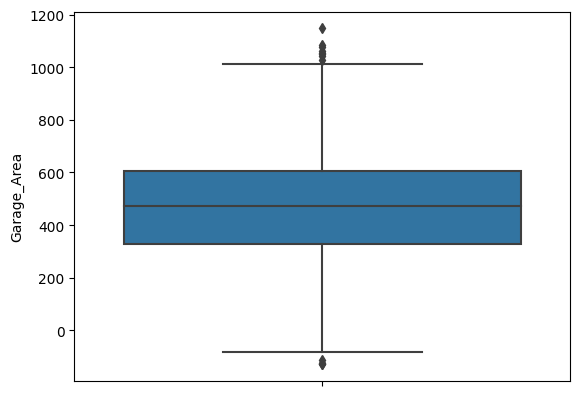

In [ ]:
sns.boxplot(y = data.Garage_Area, data = data)

In [ ]:
data.Garage_Area.value_counts()

1085.793744    1
828.356830     1
168.162022     1
563.589911     1
395.512678     1
              ..
153.523652     1
490.308093     1
99.337608      1
397.021370     1
603.143692     1
Name: Garage_Area, Length: 1459, dtype: int64

(array([ 18.,  61., 141., 268., 344., 317., 189.,  90.,  23.,   8.]),
 array([-129.36935  ,   -1.6836057,  126.0021386,  253.6878829,
         381.3736272,  509.0593715,  636.7451158,  764.4308601,
         892.1166044, 1019.8023487, 1147.488093 ]),
 <BarContainer object of 10 artists>)

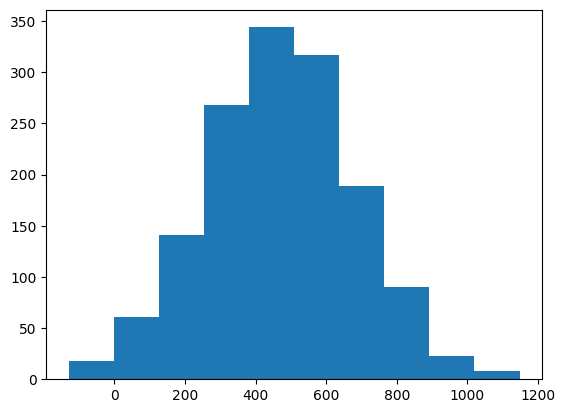

In [ ]:
plt.hist(data.Garage_Area)

<Axes: xlabel='Garage_Area', ylabel='Density'>

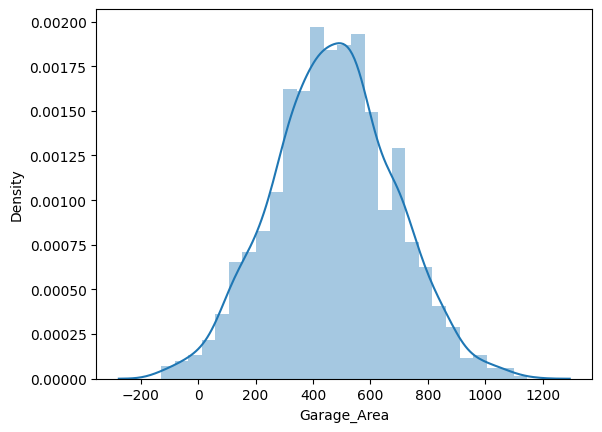

In [ ]:
sns.distplot(data.Garage_Area)

In [ ]:
iqr=data.Garage_Area.quantile(0.75)-data.Garage_Area.quantile(0.25)
iqr

277.89448834999996

In [ ]:
data["Garage_Area"].describe()

count    1459.000000
mean      470.934787
std       210.668787
min      -129.369350
25%       329.290489
50%       471.028116
75%       607.184977
max      1147.488093
Name: Garage_Area, dtype: float64

In [ ]:
lb=data["Garage_Area"].mean()-2*data["Garage_Area"].std()
ub=data["Garage_Area"].mean()+2*data["Garage_Area"].std()
print(lb,ub)

49.597212264722884 892.2723619563408


In [ ]:
data.loc[data["Garage_Area"]>892.2723619563408,"Garage_Area"]=892.2723619563408

In [ ]:
data.loc[data["Garage_Area"]<49.59721226472243,"Garage_Area"]=49.59721226472243

#Garage_Quality

In [ ]:
#sns.boxplot(y = data.Garage_Quality, data = data)#categrical data

In [ ]:
#data.Garage_Quality.value_counts()

#Garage_Condition

In [ ]:
#sns.boxplot(y = data.Garage_Condition, data = data)#categrical data

In [ ]:
#data.Garage_Condition.value_counts()

#Pavedd_Drive

In [ ]:
#sns.boxplot(y = data.Pavedd_Drive, data = data)#categrical data

In [ ]:
#data.Pavedd_Drive.value_counts()

#W_Deck_Area

<Axes: ylabel='W_Deck_Area'>

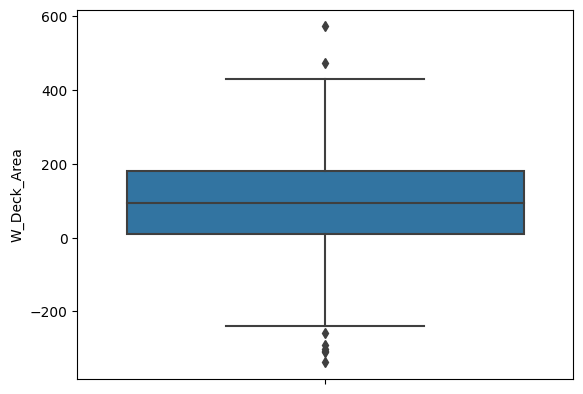

In [ ]:
sns.boxplot(y = data.W_Deck_Area, data = data)

(array([  6.,  30., 120., 270., 417., 361., 186.,  57.,  11.,   1.]),
 array([-338.1120307 , -247.07095673, -156.02988276,  -64.98880879,
          26.05226518,  117.09333915,  208.13441312,  299.17548709,
         390.21656106,  481.25763503,  572.298709  ]),
 <BarContainer object of 10 artists>)

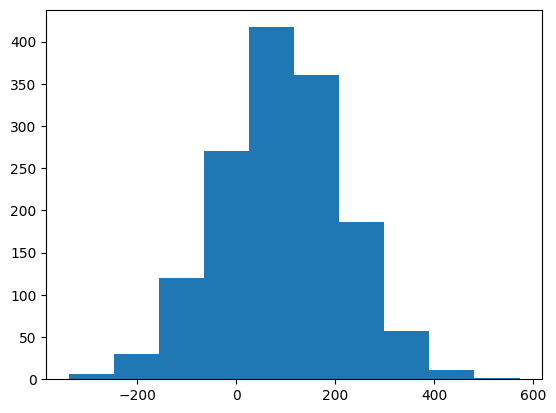

In [ ]:
plt.hist(data.W_Deck_Area)

<Axes: xlabel='W_Deck_Area', ylabel='Density'>

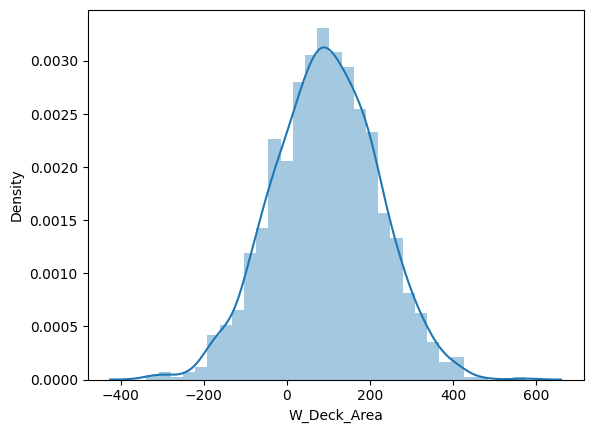

In [ ]:
sns.distplot(data.W_Deck_Area)

In [ ]:
data.W_Deck_Area.value_counts()

 163.788080    1
 131.860930    1
-51.666597     1
-25.654330     1
-53.831625     1
              ..
 139.842415    1
 236.571719    1
 118.797678    1
 22.967528     1
 144.036562    1
Name: W_Deck_Area, Length: 1459, dtype: int64

In [ ]:
iqr=data.W_Deck_Area.quantile(0.75)-data.W_Deck_Area.quantile(0.25)
iqr

170.679959763

In [ ]:
data["W_Deck_Area"].describe()

count    1459.000000
mean       93.015667
std       124.796682
min      -338.112031
25%         9.656026
50%        92.803628
75%       180.335986
max       572.298709
Name: W_Deck_Area, dtype: float64

In [ ]:
lb=data["W_Deck_Area"].mean()-2*data["W_Deck_Area"].std()
ub=data["W_Deck_Area"].mean()+2*data["W_Deck_Area"].std()
print(lb,ub)

-156.57769621330328 342.6090307634814


In [ ]:
data.loc[data["W_Deck_Area"]>342.6090307634815,"W_Deck_Area"]=342.6090307634815

In [ ]:
data.loc[data["W_Deck_Area"]<-156.5776962133031,"W_Deck_Area"]=-156.5776962133031

#Open_Lobby_Area

<Axes: ylabel='Open_Lobby_Area'>

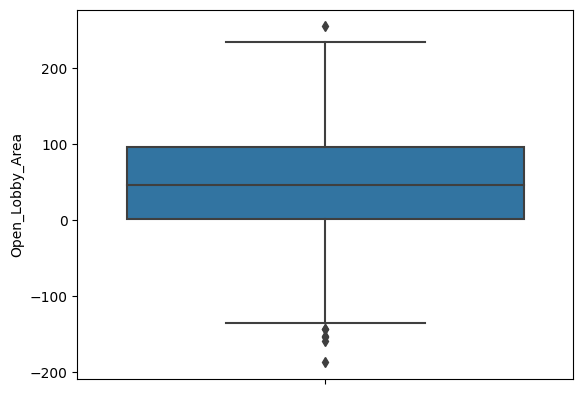

In [ ]:
sns.boxplot(y = data.Open_Lobby_Area, data = data)

(array([  6.,  15.,  75., 192., 328., 351., 300., 136.,  48.,   8.]),
 array([-187.1499582 , -142.89870766,  -98.64745712,  -54.39620658,
         -10.14495604,   34.1062945 ,   78.35754504,  122.60879558,
         166.86004612,  211.11129666,  255.3625472 ]),
 <BarContainer object of 10 artists>)

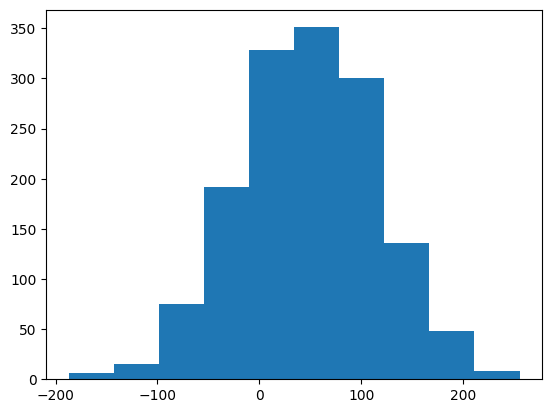

In [ ]:
plt.hist(data.Open_Lobby_Area)

<Axes: xlabel='Open_Lobby_Area', ylabel='Density'>

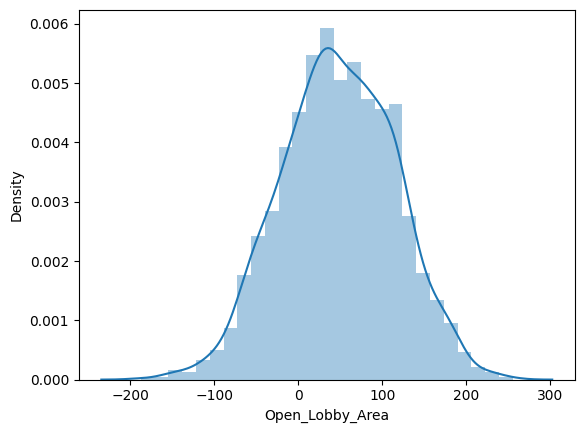

In [ ]:
sns.distplot(data.Open_Lobby_Area)

In [ ]:
data.Open_Lobby_Area.value_counts()

 69.596115     1
 74.996259     1
-56.256055     1
-9.736793      1
 17.633975     1
              ..
 99.607020     1
-42.474068     1
-19.316614     1
 110.503073    1
-33.654857     1
Name: Open_Lobby_Area, Length: 1459, dtype: int64

In [ ]:
iqr=data.Open_Lobby_Area.quantile(0.75)-data.Open_Lobby_Area.quantile(0.25)
iqr

94.68029991750001

In [ ]:
data["Open_Lobby_Area"].describe()

count    1459.000000
mean       47.811902
std        67.467586
min      -187.149958
25%         1.843186
50%        46.837919
75%        96.523486
max       255.362547
Name: Open_Lobby_Area, dtype: float64

In [ ]:
lb=data["Open_Lobby_Area"].mean()-2*data["Open_Lobby_Area"].std()
ub=data["Open_Lobby_Area"].mean()+2*data["Open_Lobby_Area"].std()
print(lb,ub)

-87.12327075387583 182.7470738982994


In [ ]:
data.loc[data["Open_Lobby_Area"]>182.7470738982994,"Open_Lobby_Area"]=182.7470738982994

In [ ]:
data.loc[data["Open_Lobby_Area"]<-87.12327075387584,"Open_Lobby_Area"]=-87.12327075387584

#Enclosed_Lobby_Area

<Axes: ylabel='Enclosed_Lobby_Area'>

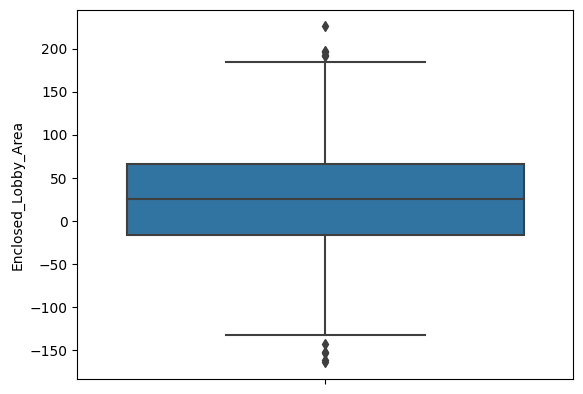

In [ ]:
sns.boxplot(y = data.Enclosed_Lobby_Area, data = data)

(array([ 11.,  42., 133., 246., 349., 334., 231.,  77.,  31.,   5.]),
 array([-164.8073862 , -125.75037617,  -86.69336614,  -47.63635611,
          -8.57934608,   30.47766395,   69.53467398,  108.59168401,
         147.64869404,  186.70570407,  225.7627141 ]),
 <BarContainer object of 10 artists>)

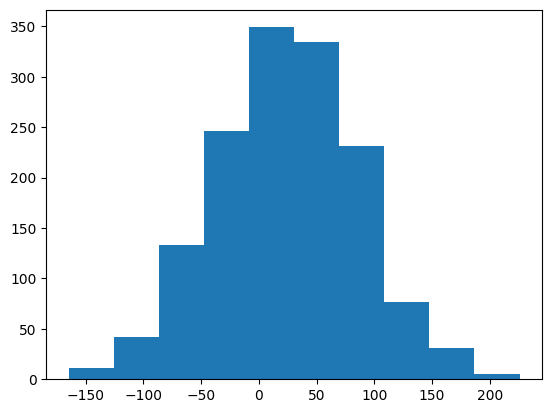

In [ ]:
plt.hist(data.Enclosed_Lobby_Area)

<Axes: xlabel='Enclosed_Lobby_Area', ylabel='Density'>

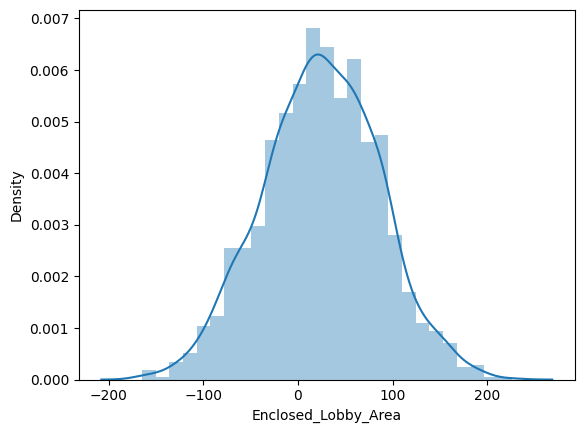

In [ ]:
sns.distplot(data.Enclosed_Lobby_Area)

In [ ]:
data.Enclosed_Lobby_Area.value_counts()

 20.337934     1
 51.835971     1
 3.441794      1
 137.448454    1
-62.700919     1
              ..
 41.446170     1
-12.312853     1
 75.348367     1
-12.406254     1
 19.498763     1
Name: Enclosed_Lobby_Area, Length: 1459, dtype: int64

In [ ]:
iqr=data.Enclosed_Lobby_Area.quantile(0.75)-data.Enclosed_Lobby_Area.quantile(0.25)
iqr

83.044892815

In [ ]:
data["Enclosed_Lobby_Area"].describe()

count    1459.000000
mean       24.580227
std        61.353507
min      -164.807386
25%       -16.807302
50%        25.026953
75%        66.237591
max       225.762714
Name: Enclosed_Lobby_Area, dtype: float64

In [ ]:
lb=data["Enclosed_Lobby_Area"].mean()-2*data["Enclosed_Lobby_Area"].std()
ub=data["Enclosed_Lobby_Area"].mean()+2*data["Enclosed_Lobby_Area"].std()
print(lb,ub)

-98.12678621459399 147.28724030164403


In [ ]:
data.loc[data["Enclosed_Lobby_Area"]>147.28724030164415,"Enclosed_Lobby_Area"]=147.28724030164415

In [ ]:
data.loc[data["Enclosed_Lobby_Area"]<-98.126786214594,"Enclosed_Lobby_Area"]=-98.126786214594

#Three_Season_Lobby_Area

In [ ]:
#sns.boxplot(y = data.Three_Season_Lobby_Area, data = data)#categrical data

In [ ]:
#data.Three_Season_Lobby_Area.value_counts()

#Screen_Lobby_Area

In [ ]:
#sns.boxplot(y = data.Screen_Lobby_Area, data = data)#categrical data

In [ ]:
#data["Screen_Lobby_Area"].describe()

In [ ]:
#data.Screen_Lobby_Area.value_counts()

#Pool_Area

In [ ]:
#sns.boxplot(y = data.Pool_Area, data = data)#categrical data

In [ ]:
#sns.boxplot(y = data.Pool_Area, data = data)#categrical data

#Miscellaneous_Value

In [ ]:
#sns.boxplot(y = data.Miscellaneous_Value, data = data)#categrical data

In [ ]:
#data.Miscellaneous_Value.value_counts()

#Month_Sold

In [ ]:
#sns.boxplot(y = data.Month_Sold, data = data)#no out layer

#Year_Sold

In [ ]:
#sns.boxplot(y = data.Year_Sold, data = data)#no out layer

#Sale_Type

In [ ]:
#sns.boxplot(y = data.Sale_Type, data = data)#categrical data

In [ ]:
#data.Sale_Type.value_counts()

#Sale_Condition

In [ ]:
#sns.boxplot(y = data.Sale_Condition, data = data)#categrical data

In [ ]:
#data.Sale_Condition.value_counts()

#Data Transformation(skewness treatment)
A skewness score of 0 indicates a perfectly symmetric distribution, while positive or negative values indicate right or left skewness, respectively. Typically, a skewness score greater than +1 or less than -1 is considered significantly skewed.

In [ ]:
data.skew()

Building_Class     0.973994
Zoning_Class      -1.734900
Lot_Extent         1.045008
Lot_Size           0.995152
Road_Type        -15.513399
                    ...    
Month_Sold         0.211740
Year_Sold          0.096521
Sale_Type         -3.867083
Sale_Condition    -2.739930
Sale_Price         1.881760
Length: 76, dtype: float64

**For Lot_Extent**

In [ ]:
# Check zero values present or not
data[data['Lot_Extent']==0]

Empty DataFrame
Columns: [Building_Class, Zoning_Class, Lot_Extent, Lot_Size, Road_Type, Property_Shape, Land_Outline, Utility_Type, Lot_Configuration, Property_Slope, Neighborhood, Condition1, Condition2, House_Type, House_Design, Overall_Material, House_Condition, Construction_Year, Remodel_Year, Roof_Design, Roof_Quality, Exterior1st, Exterior2nd, Brick_Veneer_Type, Brick_Veneer_Area, Exterior_Material, Exterior_Condition, Foundation_Type, Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Total_Basement_Area, Heating_Type, Heating_Quality, Air_Conditioning, Electrical_System, First_Floor_Area, Second_Floor_Area, LowQualFinSF, Grade_Living_Area, Underground_Full_Bathroom, Underground_Half_Bathroom, Full_Bathroom_Above_Grade, Half_Bathroom_Above_Grade, Bedroom_Above_Grade, Kitchen_Above_Grade, Kitchen_Quality, Rooms_Above_Grade, Functional_Rate, Fireplaces, Fireplace_Quality, Garage, Garage_Built_Year, Garage_Finish_Year, Garage_Size, Garage_Area, Garage_Quality, Garage_Condition, Pavedd_Drive, W_Deck_Area, Open_Lobby_Area, Enclosed_Lobby_Area, Three_Season_Lobby_Area, Screen_Lobby_Area, Pool_Area, Miscellaneous_Value, Month_Sold, Year_Sold, Sale_Type, Sale_Condition, Sale_Price]
Index: []

<Axes: xlabel='Lot_Extent', ylabel='Density'>

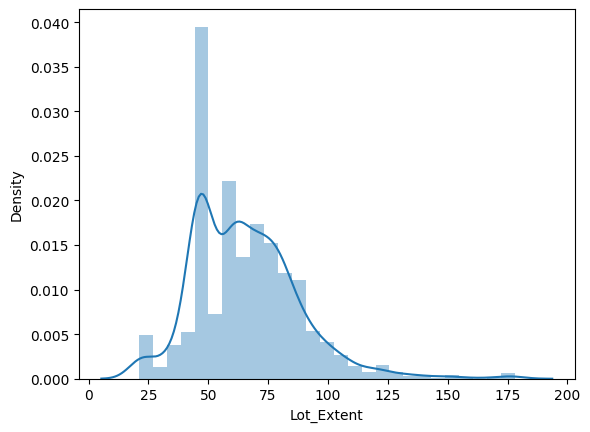

In [ ]:
sns.distplot(data.Lot_Extent)

In [ ]:
data.Lot_Extent.skew()

1.0450082333691686

In [ ]:
data.Lot_Extent = np.log(data.Lot_Extent)
data.Lot_Extent.skew()

-0.39284992794687046

<Axes: xlabel='Lot_Extent', ylabel='Density'>

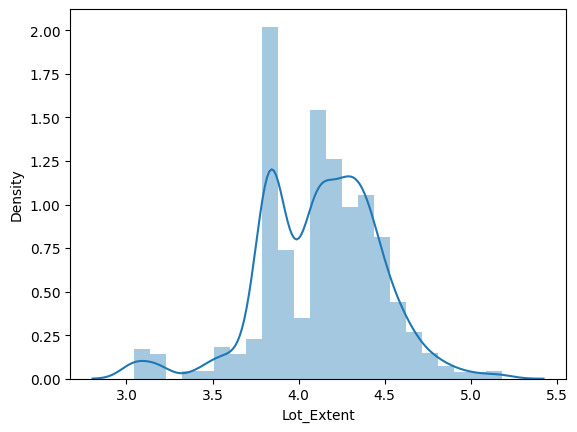

In [ ]:
sns.distplot(data.Lot_Extent)

**#Lot_Size**

In [ ]:
# Check zero values present or not
data[data['Lot_Size']==0]

Empty DataFrame
Columns: [Building_Class, Zoning_Class, Lot_Extent, Lot_Size, Road_Type, Property_Shape, Land_Outline, Utility_Type, Lot_Configuration, Property_Slope, Neighborhood, Condition1, Condition2, House_Type, House_Design, Overall_Material, House_Condition, Construction_Year, Remodel_Year, Roof_Design, Roof_Quality, Exterior1st, Exterior2nd, Brick_Veneer_Type, Brick_Veneer_Area, Exterior_Material, Exterior_Condition, Foundation_Type, Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Total_Basement_Area, Heating_Type, Heating_Quality, Air_Conditioning, Electrical_System, First_Floor_Area, Second_Floor_Area, LowQualFinSF, Grade_Living_Area, Underground_Full_Bathroom, Underground_Half_Bathroom, Full_Bathroom_Above_Grade, Half_Bathroom_Above_Grade, Bedroom_Above_Grade, Kitchen_Above_Grade, Kitchen_Quality, Rooms_Above_Grade, Functional_Rate, Fireplaces, Fireplace_Quality, Garage, Garage_Built_Year, Garage_Finish_Year, Garage_Size, Garage_Area, Garage_Quality, Garage_Condition, Pavedd_Drive, W_Deck_Area, Open_Lobby_Area, Enclosed_Lobby_Area, Three_Season_Lobby_Area, Screen_Lobby_Area, Pool_Area, Miscellaneous_Value, Month_Sold, Year_Sold, Sale_Type, Sale_Condition, Sale_Price]
Index: []

<Axes: xlabel='Lot_Size', ylabel='Density'>

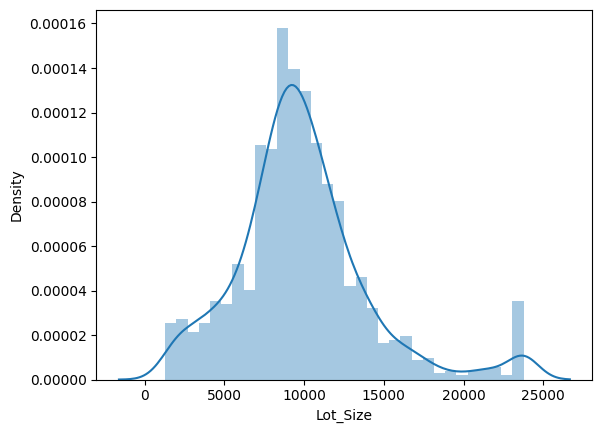

In [ ]:
sns.distplot(data.Lot_Size)

In [ ]:
data.Lot_Size.skew()

0.9951515901533421

In [ ]:
data.Lot_Size = np.sqrt(data.Lot_Size)
data.Lot_Size.skew()

0.009323001534285547

<Axes: xlabel='Lot_Size', ylabel='Density'>

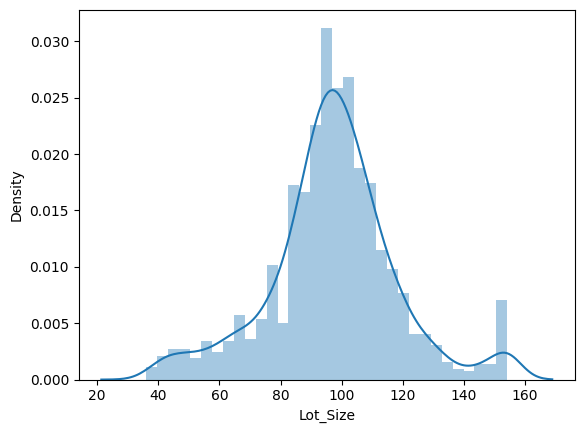

In [ ]:
sns.distplot(data.Lot_Size)

**#For BsmtFinSF1**

In [ ]:
# Check zero values present or not
data[data['BsmtFinSF1']==0]

Building_Class  Zoning_Class  Lot_Extent    Lot_Size  Road_Type  \
8               50.0             4    3.931826   78.230429          1   
13              20.0             3    4.510860  103.208527          1   
15              45.0             4    3.931826   78.230429          1   
17              90.0             3    4.276666  103.879738          1   
20              60.0             3    4.615121  119.226675          1   
...              ...           ...         ...         ...        ...   
1448            50.0             3    4.248495  108.475804          1   
1450            90.0             3    4.094345   94.868330          1   
1451            20.0             3    4.356709   96.239285          1   
1453            20.0             3    4.499810  131.213566          1   
1455            60.0             3    4.127134   88.977525          1   

      Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
8                  3             3             0                  4   
13                 0             3             0                  4   
15                 3             3             0                  0   
17                 3             3             0                  4   
20                 0             3             0                  0   
...              ...           ...           ...                ...   
1448               3             3             0                  4   
1450               3             3             0                  2   
1451               3             3             0                  4   
1453               3             3             0                  4   
1455               3             3             0                  4   

      Property_Slope  Neighborhood  Condition1  Condition2  House_Type  \
8                  0            17           0           2           0   
13                 0             5           2           2           0   
15                 0             3           2           2           0   
17                 0            19           2           2           2   
20                 0            16           2           2           0   
...              ...           ...         ...         ...         ...   
1448               0             7           2           2           0   
1450               0            12           2           2           2   
1451               0            21           2           2           0   
1453               0            11           2           2           0   
1455               0             8           2           2           0   

      House_Design  Overall_Material  House_Condition  Construction_Year  \
8                0                 7                5               1931   
13               2                 7                5               2006   
15               1                 7                8               1929   
17               2                 4                5               1967   
20               5                 8                5               2005   
...            ...               ...              ...                ...   
1448             5                 4                7               1910   
1450             5                 5                5               1974   
1451             2                 8                5               2008   
1453             2                 5                5               2006   
1455             5                 6                5               1999   

      Remodel_Year  Roof_Design  Roof_Quality  Exterior1st  Exterior2nd  \
8             1950            1             4            3           15   
13            2007            1             4           12           13   
15            2001            1             4           13           14   
17            1967            1             4            8            8   
20            2006            1             4           12           13   
...            ...      

<Axes: xlabel='BsmtFinSF1', ylabel='Density'>

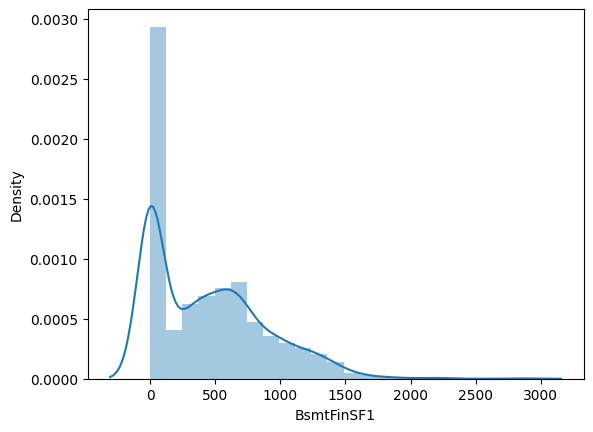

In [ ]:
sns.distplot(data.BsmtFinSF1)

In [ ]:
data.BsmtFinSF1.skew()

0.8720418389401494

In [ ]:
data.BsmtFinSF1 = np.sqrt(data.BsmtFinSF1)
data.BsmtFinSF1.skew()

-0.07190202315574451

<Axes: xlabel='BsmtFinSF1', ylabel='Density'>

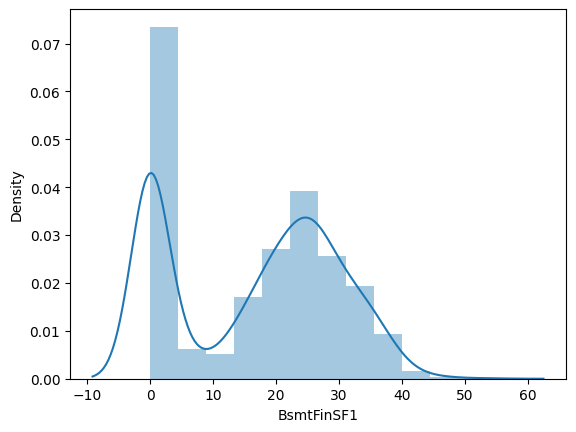

In [ ]:
sns.distplot(data.BsmtFinSF1)

**#For BsmtUnfSF**

In [ ]:
# Check zero values present or not
data[data['BsmtUnfSF']==0]

Building_Class  Zoning_Class  Lot_Extent    Lot_Size  Road_Type  \
17         90.000000             3    4.276666  103.879738          1   
39         90.000000             3    4.174387   77.717437          1   
42         85.000000             3    3.828641   95.812317          1   
52         90.000000             4    4.700480   92.043468          0   
54         80.000000             3    4.094345   84.463010          1   
...              ...           ...         ...         ...        ...   
1412       90.000000             3    4.094345   84.852814          1   
1431      120.000000             3    3.828641   70.199715          1   
1445       85.000000             3    4.248495   91.651514          1   
1452      141.530615             4    3.555348   60.621778          1   
1458       20.000000             3    4.219508   98.574845          1   

      Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
17                 3             3             0                  4   
39                 3             3             0                  4   
42                 0             3             0                  1   
52                 1             0             0                  0   
54                 3             0             0                  4   
...              ...           ...           ...                ...   
1412               3             3             0                  4   
1431               0             3             0                  4   
1445               3             3             0                  4   
1452               3             3             0                  4   
1458               3             3             0                  4   

      Property_Slope  Neighborhood  Condition1  Condition2  House_Type  \
17                 0            19           2           2           2   
39                 0             7           2           2           2   
42                 0            20           2           2           0   
52                 1             9           8           2           2   
54                 1            12           2           2           0   
...              ...           ...         ...         ...         ...   
1412               0            12           2           2           2   
1431               0            13           2           2           4   
1445               0            19           2           2           0   
1452               0             7           2           2           4   
1458               0            12           2           2           0   

      House_Design  Overall_Material  House_Condition  Construction_Year  \
17               2                 4                5               1967   
39               2                 4                5               1955   
42               6                 5                7               1983   
52               2                 5                5               1963   
54               7                 5                5               1955   
...            ...               ...              ...                ...   
1412             2                 4                5               1949   
1431             2                 6                6               1976   
1445             6                 6                5               1966   
1452             7                 5                5               2005   
1458             2                 5                6               1950   

      Remodel_Year  Roof_Design  Roof_Quality  Exterior1st  Exterior2nd  \
17            1967            1             4            8            8   
39            1955            1             4            0           10   
42            1983            1             4            6            6   
52            1963            1             4           13           14   
54            1955            1             4            8            8   
...            ...      

<Axes: xlabel='BsmtUnfSF', ylabel='Density'>

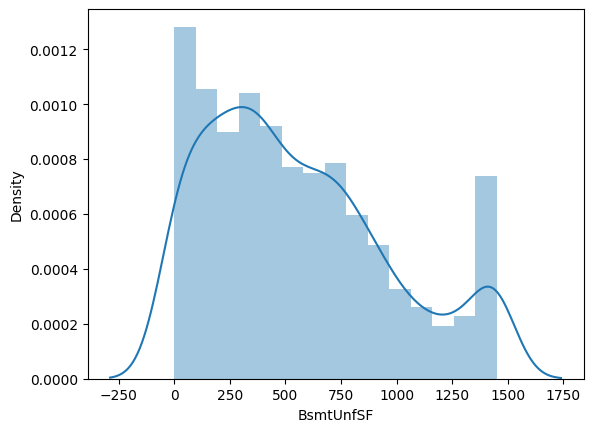

In [ ]:
sns.distplot(data.BsmtUnfSF)

In [ ]:
data.BsmtUnfSF.skew()

0.6320940973504259

In [ ]:
data.BsmtUnfSF = np.sqrt(data.BsmtUnfSF)
data.BsmtUnfSF.skew()

-0.3746887478946128

<Axes: xlabel='BsmtUnfSF', ylabel='Density'>

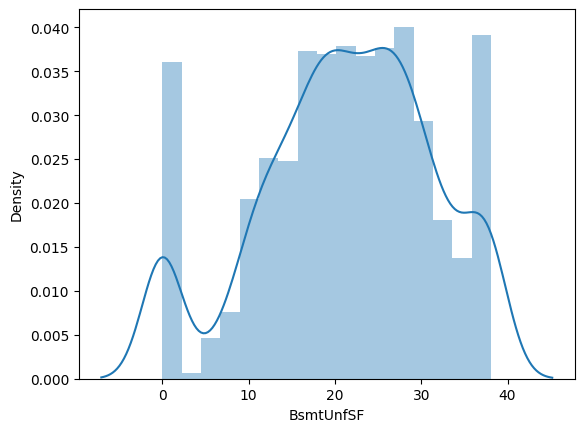

In [ ]:
sns.distplot(data.BsmtUnfSF)

**#For First_Floor_Area**

In [ ]:
# Check zero values present or not
data[data['First_Floor_Area']==0]

Empty DataFrame
Columns: [Building_Class, Zoning_Class, Lot_Extent, Lot_Size, Road_Type, Property_Shape, Land_Outline, Utility_Type, Lot_Configuration, Property_Slope, Neighborhood, Condition1, Condition2, House_Type, House_Design, Overall_Material, House_Condition, Construction_Year, Remodel_Year, Roof_Design, Roof_Quality, Exterior1st, Exterior2nd, Brick_Veneer_Type, Brick_Veneer_Area, Exterior_Material, Exterior_Condition, Foundation_Type, Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Total_Basement_Area, Heating_Type, Heating_Quality, Air_Conditioning, Electrical_System, First_Floor_Area, Second_Floor_Area, LowQualFinSF, Grade_Living_Area, Underground_Full_Bathroom, Underground_Half_Bathroom, Full_Bathroom_Above_Grade, Half_Bathroom_Above_Grade, Bedroom_Above_Grade, Kitchen_Above_Grade, Kitchen_Quality, Rooms_Above_Grade, Functional_Rate, Fireplaces, Fireplace_Quality, Garage, Garage_Built_Year, Garage_Finish_Year, Garage_Size, Garage_Area, Garage_Quality, Garage_Condition, Pavedd_Drive, W_Deck_Area, Open_Lobby_Area, Enclosed_Lobby_Area, Three_Season_Lobby_Area, Screen_Lobby_Area, Pool_Area, Miscellaneous_Value, Month_Sold, Year_Sold, Sale_Type, Sale_Condition, Sale_Price]
Index: []

<Axes: xlabel='First_Floor_Area', ylabel='Density'>

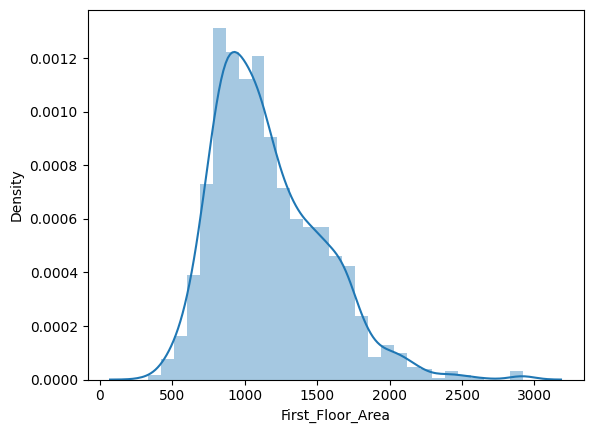

In [ ]:
sns.distplot(data.First_Floor_Area)

In [ ]:
data.First_Floor_Area.skew()

0.9356912349698568

In [ ]:
data.First_Floor_Area = np.sqrt(data.First_Floor_Area)
data.First_Floor_Area.skew()

0.47424589628553665

<Axes: xlabel='First_Floor_Area', ylabel='Density'>

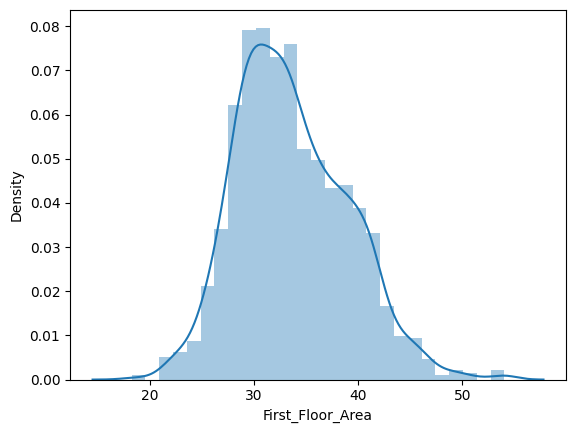

In [ ]:
sns.distplot(data.First_Floor_Area)

**#For Grade_Living_Area**

In [ ]:
# Check zero values present or not
data[data['Grade_Living_Area']==0]

Empty DataFrame
Columns: [Building_Class, Zoning_Class, Lot_Extent, Lot_Size, Road_Type, Property_Shape, Land_Outline, Utility_Type, Lot_Configuration, Property_Slope, Neighborhood, Condition1, Condition2, House_Type, House_Design, Overall_Material, House_Condition, Construction_Year, Remodel_Year, Roof_Design, Roof_Quality, Exterior1st, Exterior2nd, Brick_Veneer_Type, Brick_Veneer_Area, Exterior_Material, Exterior_Condition, Foundation_Type, Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Total_Basement_Area, Heating_Type, Heating_Quality, Air_Conditioning, Electrical_System, First_Floor_Area, Second_Floor_Area, LowQualFinSF, Grade_Living_Area, Underground_Full_Bathroom, Underground_Half_Bathroom, Full_Bathroom_Above_Grade, Half_Bathroom_Above_Grade, Bedroom_Above_Grade, Kitchen_Above_Grade, Kitchen_Quality, Rooms_Above_Grade, Functional_Rate, Fireplaces, Fireplace_Quality, Garage, Garage_Built_Year, Garage_Finish_Year, Garage_Size, Garage_Area, Garage_Quality, Garage_Condition, Pavedd_Drive, W_Deck_Area, Open_Lobby_Area, Enclosed_Lobby_Area, Three_Season_Lobby_Area, Screen_Lobby_Area, Pool_Area, Miscellaneous_Value, Month_Sold, Year_Sold, Sale_Type, Sale_Condition, Sale_Price]
Index: []

<Axes: xlabel='Grade_Living_Area', ylabel='Density'>

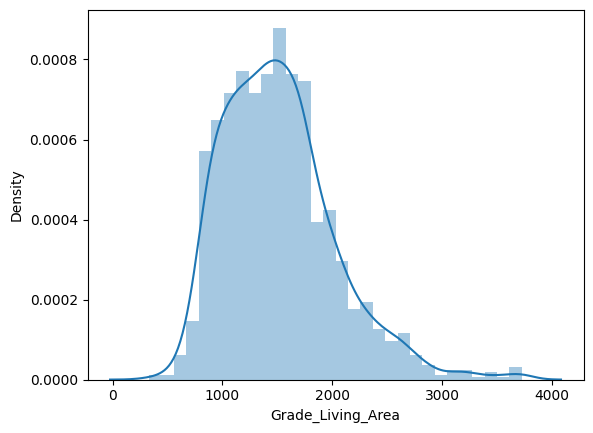

In [ ]:
sns.distplot(data.Grade_Living_Area)

In [ ]:
data.Grade_Living_Area.skew()

0.9614776042505389

In [ ]:
data.Grade_Living_Area = np.sqrt(data.Grade_Living_Area)
data.Grade_Living_Area.skew()

0.4342592077014693

<Axes: xlabel='Grade_Living_Area', ylabel='Density'>

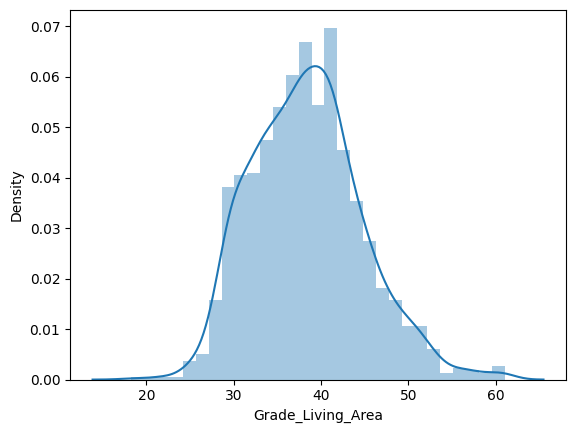

In [ ]:
sns.distplot(data.Grade_Living_Area)

**#For Garage_Area**

In [ ]:
# Check zero values present or not
data[data['Garage_Area']==0]

Empty DataFrame
Columns: [Building_Class, Zoning_Class, Lot_Extent, Lot_Size, Road_Type, Property_Shape, Land_Outline, Utility_Type, Lot_Configuration, Property_Slope, Neighborhood, Condition1, Condition2, House_Type, House_Design, Overall_Material, House_Condition, Construction_Year, Remodel_Year, Roof_Design, Roof_Quality, Exterior1st, Exterior2nd, Brick_Veneer_Type, Brick_Veneer_Area, Exterior_Material, Exterior_Condition, Foundation_Type, Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Total_Basement_Area, Heating_Type, Heating_Quality, Air_Conditioning, Electrical_System, First_Floor_Area, Second_Floor_Area, LowQualFinSF, Grade_Living_Area, Underground_Full_Bathroom, Underground_Half_Bathroom, Full_Bathroom_Above_Grade, Half_Bathroom_Above_Grade, Bedroom_Above_Grade, Kitchen_Above_Grade, Kitchen_Quality, Rooms_Above_Grade, Functional_Rate, Fireplaces, Fireplace_Quality, Garage, Garage_Built_Year, Garage_Finish_Year, Garage_Size, Garage_Area, Garage_Quality, Garage_Condition, Pavedd_Drive, W_Deck_Area, Open_Lobby_Area, Enclosed_Lobby_Area, Three_Season_Lobby_Area, Screen_Lobby_Area, Pool_Area, Miscellaneous_Value, Month_Sold, Year_Sold, Sale_Type, Sale_Condition, Sale_Price]
Index: []

<Axes: xlabel='Garage_Area', ylabel='Density'>

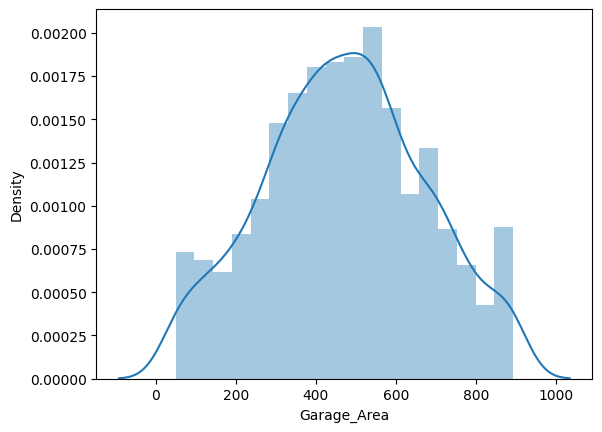

In [ ]:
sns.distplot(data.Garage_Area)

In [ ]:
data.Garage_Area.skew()

0.006772653546797702

In [ ]:
#data.Garage_Area = np.sqrt(data.Garage_Area)
#data.Garage_Area.skew()

In [ ]:
#sns.distplot(data.Garage_Area)

**#For W_Deck_Area**

In [ ]:
# Check zero values present or not
data[data['W_Deck_Area']==0]

Empty DataFrame
Columns: [Building_Class, Zoning_Class, Lot_Extent, Lot_Size, Road_Type, Property_Shape, Land_Outline, Utility_Type, Lot_Configuration, Property_Slope, Neighborhood, Condition1, Condition2, House_Type, House_Design, Overall_Material, House_Condition, Construction_Year, Remodel_Year, Roof_Design, Roof_Quality, Exterior1st, Exterior2nd, Brick_Veneer_Type, Brick_Veneer_Area, Exterior_Material, Exterior_Condition, Foundation_Type, Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Total_Basement_Area, Heating_Type, Heating_Quality, Air_Conditioning, Electrical_System, First_Floor_Area, Second_Floor_Area, LowQualFinSF, Grade_Living_Area, Underground_Full_Bathroom, Underground_Half_Bathroom, Full_Bathroom_Above_Grade, Half_Bathroom_Above_Grade, Bedroom_Above_Grade, Kitchen_Above_Grade, Kitchen_Quality, Rooms_Above_Grade, Functional_Rate, Fireplaces, Fireplace_Quality, Garage, Garage_Built_Year, Garage_Finish_Year, Garage_Size, Garage_Area, Garage_Quality, Garage_Condition, Pavedd_Drive, W_Deck_Area, Open_Lobby_Area, Enclosed_Lobby_Area, Three_Season_Lobby_Area, Screen_Lobby_Area, Pool_Area, Miscellaneous_Value, Month_Sold, Year_Sold, Sale_Type, Sale_Condition, Sale_Price]
Index: []

<Axes: xlabel='W_Deck_Area', ylabel='Density'>

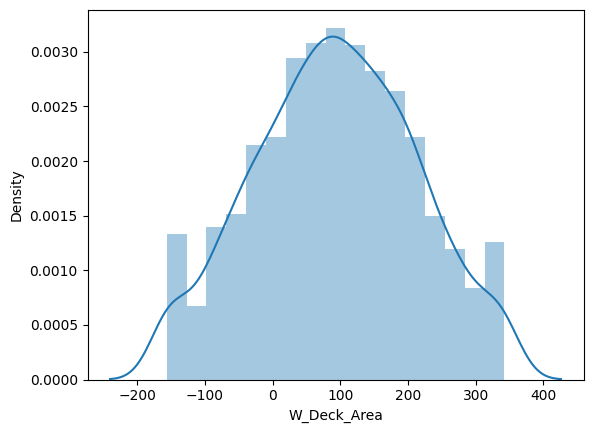

In [ ]:
sns.distplot(data.W_Deck_Area)

In [ ]:
data.W_Deck_Area.skew()

-0.020698489536010722

In [ ]:
#data.W_Deck_Area = np.sqrt(data.W_Deck_Area)
#data.W_Deck_Area.skew()

In [ ]:
#sns.distplot(data.W_Deck_Area)

**#For Open_Lobby_Area**

In [ ]:
# Check zero values present or not
data[data['Open_Lobby_Area']==0]

Empty DataFrame
Columns: [Building_Class, Zoning_Class, Lot_Extent, Lot_Size, Road_Type, Property_Shape, Land_Outline, Utility_Type, Lot_Configuration, Property_Slope, Neighborhood, Condition1, Condition2, House_Type, House_Design, Overall_Material, House_Condition, Construction_Year, Remodel_Year, Roof_Design, Roof_Quality, Exterior1st, Exterior2nd, Brick_Veneer_Type, Brick_Veneer_Area, Exterior_Material, Exterior_Condition, Foundation_Type, Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Total_Basement_Area, Heating_Type, Heating_Quality, Air_Conditioning, Electrical_System, First_Floor_Area, Second_Floor_Area, LowQualFinSF, Grade_Living_Area, Underground_Full_Bathroom, Underground_Half_Bathroom, Full_Bathroom_Above_Grade, Half_Bathroom_Above_Grade, Bedroom_Above_Grade, Kitchen_Above_Grade, Kitchen_Quality, Rooms_Above_Grade, Functional_Rate, Fireplaces, Fireplace_Quality, Garage, Garage_Built_Year, Garage_Finish_Year, Garage_Size, Garage_Area, Garage_Quality, Garage_Condition, Pavedd_Drive, W_Deck_Area, Open_Lobby_Area, Enclosed_Lobby_Area, Three_Season_Lobby_Area, Screen_Lobby_Area, Pool_Area, Miscellaneous_Value, Month_Sold, Year_Sold, Sale_Type, Sale_Condition, Sale_Price]
Index: []

<Axes: xlabel='Open_Lobby_Area', ylabel='Density'>

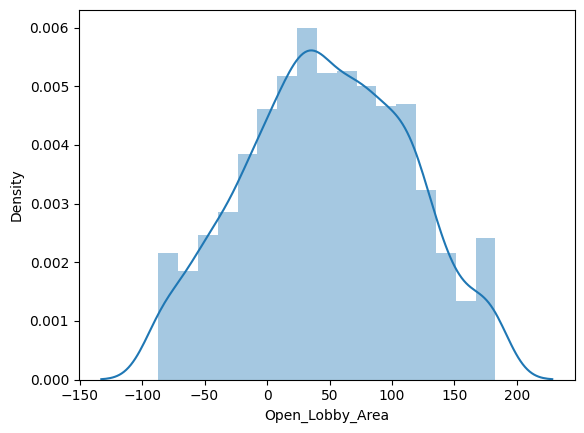

In [ ]:
sns.distplot(data.Open_Lobby_Area)

In [ ]:
data.Open_Lobby_Area.skew()

-0.017772487284804035

In [ ]:
#data.Open_Lobby_Area = np.sqrt(data.Open_Lobby_Area)
#data.Open_Lobby_Area.skew()

In [ ]:
#sns.distplot(data.Open_Lobby_Area)

**#For Enclosed_Lobby_Area**

In [ ]:
# Check zero values present or not
data[data['Enclosed_Lobby_Area']==0]

Empty DataFrame
Columns: [Building_Class, Zoning_Class, Lot_Extent, Lot_Size, Road_Type, Property_Shape, Land_Outline, Utility_Type, Lot_Configuration, Property_Slope, Neighborhood, Condition1, Condition2, House_Type, House_Design, Overall_Material, House_Condition, Construction_Year, Remodel_Year, Roof_Design, Roof_Quality, Exterior1st, Exterior2nd, Brick_Veneer_Type, Brick_Veneer_Area, Exterior_Material, Exterior_Condition, Foundation_Type, Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Total_Basement_Area, Heating_Type, Heating_Quality, Air_Conditioning, Electrical_System, First_Floor_Area, Second_Floor_Area, LowQualFinSF, Grade_Living_Area, Underground_Full_Bathroom, Underground_Half_Bathroom, Full_Bathroom_Above_Grade, Half_Bathroom_Above_Grade, Bedroom_Above_Grade, Kitchen_Above_Grade, Kitchen_Quality, Rooms_Above_Grade, Functional_Rate, Fireplaces, Fireplace_Quality, Garage, Garage_Built_Year, Garage_Finish_Year, Garage_Size, Garage_Area, Garage_Quality, Garage_Condition, Pavedd_Drive, W_Deck_Area, Open_Lobby_Area, Enclosed_Lobby_Area, Three_Season_Lobby_Area, Screen_Lobby_Area, Pool_Area, Miscellaneous_Value, Month_Sold, Year_Sold, Sale_Type, Sale_Condition, Sale_Price]
Index: []

<Axes: xlabel='Enclosed_Lobby_Area', ylabel='Density'>

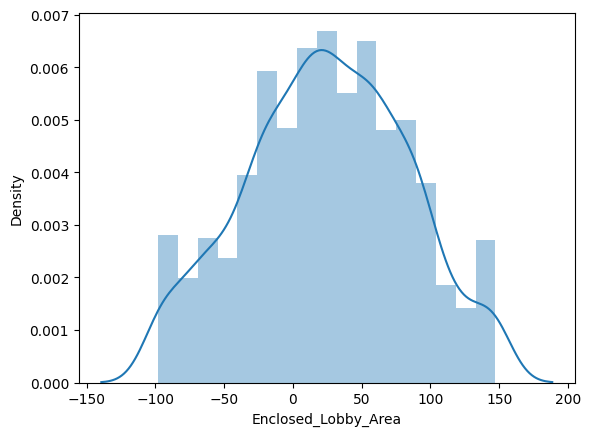

In [ ]:
sns.distplot(data.Enclosed_Lobby_Area)

In [ ]:
data.Enclosed_Lobby_Area.skew()

-0.04608563764117628

In [ ]:
#data.Enclosed_Lobby_Area = np.sqrt(data.Enclosed_Lobby_Area)
#data.Enclosed_Lobby_Area.skew()

In [ ]:
#sns.distplot(data.Enclosed_Lobby_Area)

In [ ]:
#data.skew()

#Data Visualization

In [ ]:
Sale_Price =data["Sale_Price"]
Sale_Price 

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: Sale_Price, Length: 1459, dtype: int64

In [ ]:
df=data.drop(["Sale_Price"],axis=1)
df.head(2)

Building_Class  Zoning_Class  Lot_Extent   Lot_Size  Road_Type  \
0            60.0             3    4.174387  91.923882          1   
1            20.0             3    4.382027  97.979590          1   

   Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
0               3             3             0                  4   
1               3             3             0                  2   

   Property_Slope  Neighborhood  Condition1  Condition2  House_Type  \
0               0             5           2           2           0   
1               0            24           1           2           0   

   House_Design  Overall_Material  House_Condition  Construction_Year  \
0             5                 7                5               2003   
1             2                 6                8               1976   

   Remodel_Year  Roof_Design  Roof_Quality  Exterior1st  Exterior2nd  \
0          2003            1             4           12           13   
1          1976            1             4            8            8   

   Brick_Veneer_Type  Brick_Veneer_Area  Exterior_Material  \
0                  1              196.0                  2   
1                  2                0.0                  3   

   Exterior_Condition  Foundation_Type  Basement_Height  Basement_Condition  \
0                   4                2                2                   3   
1                   4                1                2                   3   

   Exposure_Level  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0               3             2   26.570661             5           0   
1               1             0   31.272992             5           0   

   BsmtUnfSF  Total_Basement_Area  Heating_Type  Heating_Quality  \
0  12.247449                856.0             1                0   
1  16.852300               1262.0             1                0   

   Air_Conditioning  Electrical_System  First_Floor_Area  Second_Floor_Area  \
0                 1                  4         29.257478                854   
1                 1                  4         35.524639                  0   

   LowQualFinSF  Grade_Living_Area  Underground_Full_Bathroom  \
0             0          41.352146                          1   
1             0          35.524639                          0   

   Underground_Half_Bathroom  Full_Bathroom_Above_Grade  \
0                          0                          2   
1                          1                          2   

   Half_Bathroom_Above_Grade  Bedroom_Above_Grade  Kitchen_Above_Grade  \
0                          1                    3                    1   
1                          0                    3                    1   

   Kitchen_Quality  Rooms_Above_Grade  Functional_Rate  Fireplaces  \
0                2                  8                7           0   
1                3                  6                7           1   

   Fireplace_Quality  Garage  Garage_Built_Year  Garage_Finish_Year  \
0                  5       2             2003.0                   1   
1                  4       2             1976.0                   1   

   Garage_Size  Garage_Area  Garage_Quality  Garage_Condition  Pavedd_Drive  \
0            2   892.272362               4                 4             2   
1            2   196.316304               4                 4             2   

   W_Deck_Area  Open_Lobby_Area  Enclosed_Lobby_Area  Three_Season_Lobby_Area  \
0   163.788080        69.596115            20.337934                        0   
1   198.900074        74.716033            15.039392                        0   

   Screen_Lobby_Area  Pool_Area  Miscellaneous_Value  Month_Sold  Year_Sold  \
0                  0          0                    0           2       2008   
1                  0          0                    0           5       2007   

   Sale_Type  Sale_Condition  
0          8               4  
1          8               4

In [ ]:
s_x=df
s_y=Sale_Price 

#Splitting train and test

In [ ]:
sx_train,sx_test,sy_train,sy_test=train_test_split(s_x,s_y,test_size=0.2,random_state=100)

In [ ]:
sx_train.shape,sx_test.shape,sy_train.shape,sy_test.shape

((1167, 75), (292, 75), (1167,), (292,))

In [ ]:
sy_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1167 entries, 656 to 792
Series name: Sale_Price
Non-Null Count  Dtype
--------------  -----
1167 non-null   int64
dtypes: int64(1)
memory usage: 18.2 KB


#GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()
model.fit(sx_train,sy_train)

HistGradientBoostingRegressor()

In [ ]:
lin_p1=model.predict(sx_test)
lin_p1

array([219758.95524812, 146250.88345297, 115981.53317241, 388978.12209589,
       233788.92776677, 148201.68356115, 124903.83777246, 127005.53082256,
       339267.66119599, 144152.07969257, 158690.33606811, 196866.7630942 ,
       140073.26740621, 141890.1948041 , 171880.72005797, 149969.1047677 ,
       320372.53660292, 203863.20139538, 193297.62979639, 106473.15304933,
       114291.99043036, 187105.42913281,  95880.69208172, 164870.25399293,
       142221.10638987, 164811.59646539, 140407.18239737, 225812.33257534,
        88356.87747179, 194917.05237329, 191995.97555779, 370418.42862258,
       308248.13954282, 132509.25737999, 156499.25209651, 133962.07472717,
       194433.22462742, 127750.77221039, 228992.12628892, 129833.20783815,
        85005.61413087, 192677.49262272, 108000.80393892, 101435.17594971,
       152111.19848896, 121288.83876134, 176021.69995566,  76225.77610792,
       253860.66083492, 214113.84046545, 413062.01779658, 124597.7205143 ,
       343689.03459136, 1

In [ ]:
s_R2=model.score(sx_train,sy_train)
s_R2

0.9773432148354603

In [ ]:
s_adjR2=1-(((1-s_R2)*(1167-1))/(1167-75-1))
s_adjR2

0.9757856906490804

In [ ]:
s_mse=metrics.mean_squared_error(sy_test,lin_p1)
s_mse

586160746.7000418

In [ ]:
s_rmse=pow(s_mse,0.5)
s_rmse

24210.756838645953

#Linear Regression

In [ ]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [ ]:
lin.fit(sx_train,sy_train)

LinearRegression()

In [ ]:
lin_p1=lin.predict(sx_test)
lin_p1

array([207677.1119884 , 142107.384985  , 117083.6727186 , 337592.20210365,
       244829.16123785, 156451.46693181, 125934.26923236, 122884.13228843,
       341714.19983838, 136053.41935766, 174726.88023925, 215807.89254693,
       114112.26298105,  71662.90594561, 188002.56079919, 147077.28592495,
       337092.38051991, 206219.48740213, 223637.60033606, 102100.36246193,
       114444.80155216, 193125.45820161, 109288.75682168, 174691.91605736,
       144667.55140232, 190169.58231768, 146081.341702  , 250451.07495946,
        90624.92451321, 195034.84503308, 197474.91030307, 373003.80879856,
       335454.87237946, 132693.50504615, 194990.40173292, 141422.26428256,
       185728.73803969, 124602.581149  , 279441.7225359 , 156137.73815048,
        83730.98609372, 175807.04074707,  89699.34440438, 108028.73754035,
       163642.62737242,  88885.15326616, 180207.20352943,  77083.41045289,
       276798.52693214, 216566.55216551, 413611.91277993, 111501.4516116 ,
       288522.00625266, 1

In [ ]:
s_R2=lin.score(sx_train,sy_train)
s_R2

0.8699401561850586

In [ ]:
s_adjR2=1-(((1-s_R2)*(1167-1))/(1167-75-1))
s_adjR2

0.8609992869952139

In [ ]:
s_mse=metrics.mean_squared_error(sy_test,lin_p1)
s_mse

770460426.8110324

In [ ]:
s_rmse=pow(s_mse,0.5)
s_rmse

27757.16892644191

In [ ]:
df2=pd.DataFrame({"Actual":sy_test,"Predicted":lin_p1})
df2

Actual      Predicted
789  187500  207677.111988
425  135000  142107.384985
204  110000  117083.672719
118  320000  337592.202104
244  205000  244829.161238
..      ...            ...
907  250000  223650.254703
372  125000  119758.963110
913  145000  140750.144230
133  220000  239560.452056
290  233230  242739.246350

[292 rows x 2 columns]

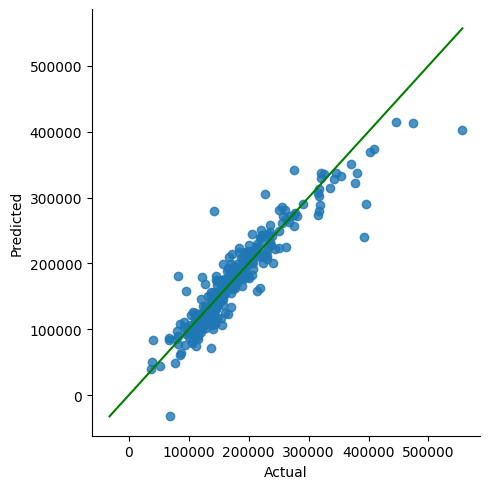

In [ ]:
sns.lmplot(x="Actual",y="Predicted",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

#XG boost

In [ ]:
from xgboost import XGBRFRegressor
xg1=XGBRFRegressor()

In [ ]:
xg1.fit(sx_train,sy_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [ ]:
xg1_p=xg1.predict(sx_test)

In [ ]:
R_xg1=xg1.score(sx_train,sy_train)
R_xg1

0.9464511264962002

In [ ]:
Adj_xg1=1-(((1-R_xg1)*(1167-1))/(1167-75-1))
Adj_xg1

0.9427699482076713

In [ ]:
xg1_mse=metrics.mean_squared_error(sy_test,xg1_p)
xg1_mse 

770600580.302978

In [ ]:
xg1_df=pd.DataFrame({"Actual":sy_test,"Predicted":xg1_p})
xg1_df

Actual      Predicted
789  187500  191405.500000
425  135000  147281.656250
204  110000  116721.890625
118  320000  295787.625000
244  205000  238221.703125
..      ...            ...
907  250000  237417.953125
372  125000  126220.601562
913  145000  156089.531250
133  220000  236614.078125
290  233230  243955.109375

[292 rows x 2 columns]

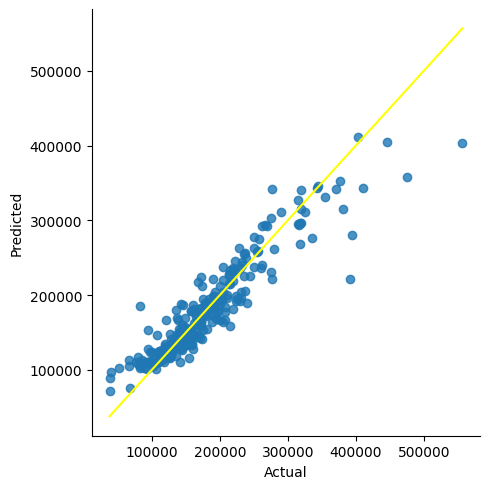

In [ ]:
sns.lmplot(x="Actual",y="Predicted",data=xg1_df,fit_reg=False)
d_line=np.arange(xg1_df.min().min(),xg1_df.max().max())
plt.plot(d_line,d_line,color="yellow",linestyle="-")
plt.show()

#Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr1=RandomForestRegressor()

In [ ]:
rfr1.fit(sx_train,sy_train)

RandomForestRegressor()

In [ ]:
rfr1_p=rfr1.predict(sx_test)

In [ ]:
R_rf1=rfr1.score(sx_train,sy_train)
R_rf1

0.9795795662017236

In [ ]:
Adj_rf1=1-(((1-R_rf1)*(1167-1))/(1167-75-1))
Adj_rf1

0.9781757783604123

In [ ]:
Rf_mse1=metrics.mean_squared_error(sy_test,rfr1_p)
Rf_mse1

646147970.8771719

In [ ]:
Rf_df=pd.DataFrame({"Actual":sy_test,"Predicted":rfr1_p})
Rf_df

Actual  Predicted
789  187500  199635.34
425  135000  154307.97
204  110000  114380.79
118  320000  291025.34
244  205000  236583.20
..      ...        ...
907  250000  238817.43
372  125000  125188.50
913  145000  149416.00
133  220000  237758.65
290  233230  249257.31

[292 rows x 2 columns]

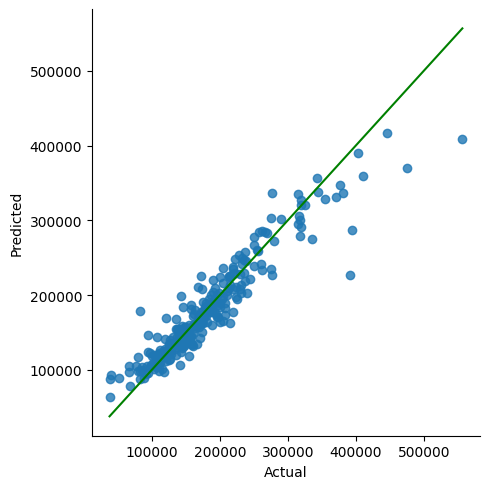

In [ ]:
sns.lmplot(x="Actual",y="Predicted",data=Rf_df,fit_reg=False)
d_line=np.arange(Rf_df.min().min(),Rf_df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

#After EDA Final result

In [ ]:
list5=["RandomForestRegressor","LinearRegression","XGBRFRegressor"]
list6=[R_rf1,s_R2,R_xg1]
list7=[Adj_rf1,s_adjR2,Adj_xg1]
list8=[Rf_mse1,s_mse,xg1_mse]

In [ ]:
after_eda=pd.DataFrame({"Model_Name":list5,"R-square":list6,"Adj_R2":list7,"MSE":list8})
after_eda

Model_Name  R-square    Adj_R2           MSE
0  RandomForestRegressor  0.979580  0.978176  6.461480e+08
1       LinearRegression  0.869940  0.860999  7.704604e+08
2         XGBRFRegressor  0.946451  0.942770  7.706006e+08

In [ ]:
before_eda

Model_Name  R-square    Adj_R2           MSE
0        Linear Regression  0.878099  0.869719  2.185679e+09
1  Random Forest Regressor  0.981678  0.980418  8.677106e+08
2       XG-Boost Regressor  0.948144  0.944579  9.255865e+08
3        AdaBoostRegressor  0.886906  0.879132  1.105038e+09

#Conclusion

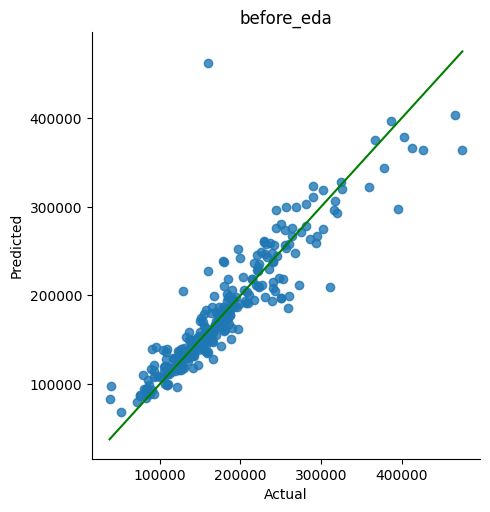

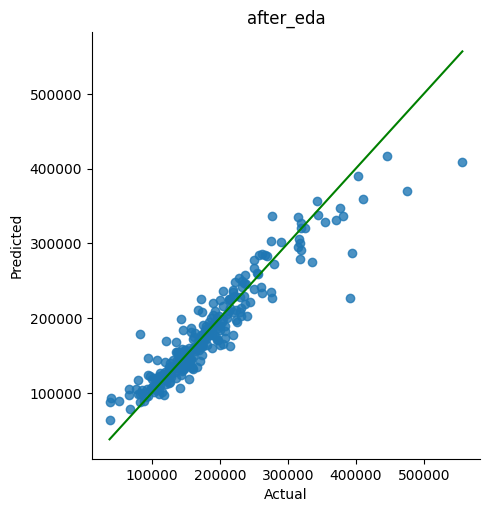

In [ ]:
sns.lmplot(x="Actual",y="Predicted",data=rf_df,fit_reg=False)
d_line=np.arange(rf_df.min().min(),rf_df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.title("before_eda")
plt.show()
sns.lmplot(x="Actual",y="Predicted",data=Rf_df,fit_reg=False)
d_line=np.arange(Rf_df.min().min(),Rf_df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.title("after_eda")
plt.show()